<h1> TP2 </h1>

In [1]:
# pip install  pandas matplotlib numpy

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_table("ml-100k/u.data", header=None,names=["user_id", "item_id", "rating","timestamps"])
data.shape

(100000, 4)

In [4]:
# preview the data 
data.head()

user_id  item_id  rating  timestamps
0      196      242       3   881250949
1      186      302       3   891717742
2       22      377       1   878887116
3      244       51       2   880606923
4      166      346       1   886397596

In [5]:
# votes matrix
matrix= data.pivot_table(index=['user_id'],columns=['item_id'],values='rating')
original_matrix = matrix.copy()
matrix.shape

(943, 1682)

In [6]:
matrix

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5         4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN  ...   
940       NaN   NaN   NaN   2.0   NaN   NaN   4.0   5.0   3.0   NaN  ...   
941       5.0   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN  ...   
942       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
943       NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
939       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
940       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
941       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
942       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
943       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[943 rows x 1682 columns]

In [7]:
# avrage votes for each user 
matrix['AVG_VOTE_USER']=matrix.mean(axis=1)
matrix['AVG_VOTE_USER']

user_id
1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
         ...   
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Name: AVG_VOTE_USER, Length: 943, dtype: float64

In [8]:
# avrage votes for each item 
matrix.loc['AVG_VOTE_ITEM'] = matrix.mean()
matrix.loc['AVG_VOTE_ITEM']

item_id
1                3.878319
2                3.206107
3                3.033333
4                3.550239
5                3.302326
                   ...   
1679             3.000000
1680             2.000000
1681             3.000000
1682             3.000000
AVG_VOTE_USER    3.588191
Name: AVG_VOTE_ITEM, Length: 1683, dtype: float64

In [9]:
# avrage votes for  user 100
print(f'Avrage votes for user 100 : {matrix.AVG_VOTE_USER[100]}')

Avrage votes for user 100 : 3.0677966101694913


In [10]:
# avrage votes for movie 53
print(f'Avrage votes for movie 53 : { matrix.loc["AVG_VOTE_ITEM"][53] }')

Avrage votes for movie 53 : 2.953125


In [11]:
# number of votes made by every user
matrix['NBR_VOTES_USER']=(matrix>0).sum(axis=1)-1
matrix['NBR_VOTES_USER']

user_id
1                 272
2                  62
3                  54
4                  24
5                 175
                 ... 
940               107
941                22
942                79
943               168
AVG_VOTE_ITEM    1682
Name: NBR_VOTES_USER, Length: 944, dtype: int64

In [12]:
# most and least number of votes by user
print(f'The most number of votes  made by a user')
matrix.loc[ matrix["NBR_VOTES_USER"]==matrix["NBR_VOTES_USER"][:-1].max(),['NBR_VOTES_USER']]


The most number of votes  made by a user


item_id  NBR_VOTES_USER
user_id                
405                 737

In [13]:
print(f'The least number of votes  made by a user')
matrix.loc[matrix["NBR_VOTES_USER"]==matrix["NBR_VOTES_USER"][:-1].min(),['NBR_VOTES_USER']]

The least number of votes  made by a user


item_id  NBR_VOTES_USER
user_id                
19                   20
34                   20
36                   20
93                   20
143                  20
147                  20
166                  20
202                  20
242                  20
300                  20
309                  20
364                  20
418                  20
441                  20
475                  20
558                  20
571                  20
572                  20
596                  20
631                  20
636                  20
685                  20
732                  20
740                  20
809                  20
812                  20
824                  20
866                  20
873                  20
888                  20
895                  20
926                  20

In [14]:
# number of votes for each item 
matrix.loc['NBR_VOTES_ITEM']=(matrix>0).sum(axis=0)-1
matrix.loc['NBR_VOTES_ITEM']

item_id
1                 452.0
2                 131.0
3                  90.0
4                 209.0
5                  86.0
                  ...  
1680                1.0
1681                1.0
1682                1.0
AVG_VOTE_USER     943.0
NBR_VOTES_USER    943.0
Name: NBR_VOTES_ITEM, Length: 1684, dtype: float64

In [15]:
# most and least number of votes by movie
print(f'The most number of votes  made for a movie:')
items = matrix.loc['NBR_VOTES_ITEM'] == matrix.loc['NBR_VOTES_ITEM'][:-2].max()
items[items == True].index.tolist()

The most number of votes  made for a movie:


[50]

In [16]:
print(f'The least number of votes for a movie: ')
items = matrix.loc['NBR_VOTES_ITEM'] == matrix.loc['NBR_VOTES_ITEM'][:-2].min()
items[items == True].index.tolist()

The least number of votes for a movie: 


[599,
 677,
 711,
 814,
 830,
 852,
 857,
 1122,
 1130,
 1156,
 1201,
 1235,
 1236,
 1309,
 1310,
 1320,
 1325,
 1329,
 1339,
 1340,
 1341,
 1343,
 1348,
 1349,
 1352,
 1363,
 1364,
 1366,
 1373,
 1414,
 1447,
 1452,
 1453,
 1457,
 1458,
 1460,
 1461,
 1476,
 1482,
 1486,
 1492,
 1493,
 1494,
 1498,
 1505,
 1507,
 1510,
 1515,
 1520,
 1525,
 1526,
 1533,
 1536,
 1543,
 1546,
 1548,
 1557,
 1559,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1574,
 1575,
 1576,
 1577,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1586,
 1587,
 1593,
 1595,
 1596,
 1599,
 1601,
 1603,
 1604,
 1606,
 1613,
 1614,
 1616,
 1618,
 1619,
 1621,
 1624,
 1625,
 1626,
 1627,
 1630,
 1632,
 1633,
 1634,
 1635,
 1636,
 1637,
 1638,
 1640,
 1641,
 1645,
 1647,
 1648,
 1649,
 1650,
 1651,
 1653,
 1654,
 1655,
 1657,
 1659,
 1660,
 1661,
 1663,
 1665,
 1666,
 1667,
 1668,
 1669,
 1670,
 1671,
 1673,
 1674,
 1675,
 1676,
 1677,
 1678,
 1679,
 1680,
 1681,
 1682]

In [17]:
# THE % OF EMPTY COLUMN FOR EACH ROW
(original_matrix.isna().sum() / original_matrix.shape[0])

item_id
1       0.520679
2       0.861082
3       0.904560
4       0.778367
5       0.908802
          ...   
1678    0.998940
1679    0.998940
1680    0.998940
1681    0.998940
1682    0.998940
Length: 1682, dtype: float64

In [18]:
# THE % OF EMPTY COLUMN IN TOTALE
print(f'The % of empty column in totale is : % {(original_matrix.isna().sum() / original_matrix.shape[0]).sum()/ original_matrix.shape[1]}')

The % of empty column in totale is : % 0.9369533063577545


Text(0, 0.5, 'users')

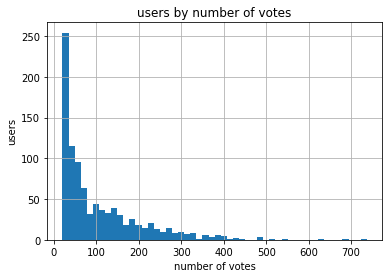

In [19]:
hist = matrix['NBR_VOTES_USER'][:-2].hist(bins=50)
hist.set_title('users by number of votes')
hist.set_xlabel('number of votes')
hist.set_ylabel('users')


In [20]:
df_user =open("ml-100k/u.user")
user_data = pd.read_csv(df_user, sep="|",names=["user_id","age", "gender", "occupation", "zip code"])
user_data.head()

user_id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

In [21]:
full_data =pd.merge(data,user_data,on='user_id').sort_values('user_id')
full_data

user_id  item_id  rating  timestamps  age gender  occupation zip code
20397        1       61       4   878542420   24      M  technician    85711
20558        1      270       5   888732827   24      M  technician    85711
20557        1       40       3   876893230   24      M  technician    85711
20556        1      211       3   878541970   24      M  technician    85711
20555        1      141       3   878542608   24      M  technician    85711
...        ...      ...     ...         ...  ...    ...         ...      ...
99587      943      559       4   888639638   22      M     student    77841
99588      943      121       3   875502096   22      M     student    77841
99589      943      402       2   888639702   22      M     student    77841
99581      943      720       1   888640048   22      M     student    77841
99625      943        2       5   888639953   22      M     student    77841

[100000 rows x 8 columns]

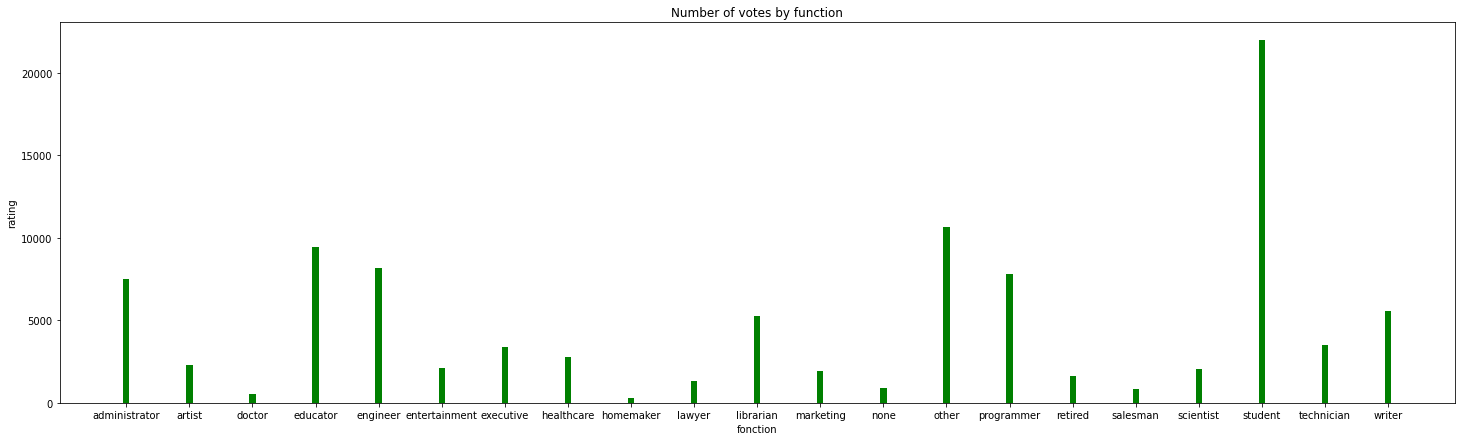

In [22]:
data_=full_data.groupby('occupation').rating.count()
m=data_.reset_index().rename(columns={full_data.index.name:'rating'})
f=plt.figure(figsize=(25,7))
plt.bar(m.occupation,m.rating,color='green',width=0.1)
plt.xlabel('fonction')
plt.ylabel('rating')
plt.title('Number of votes by function')
plt.show()

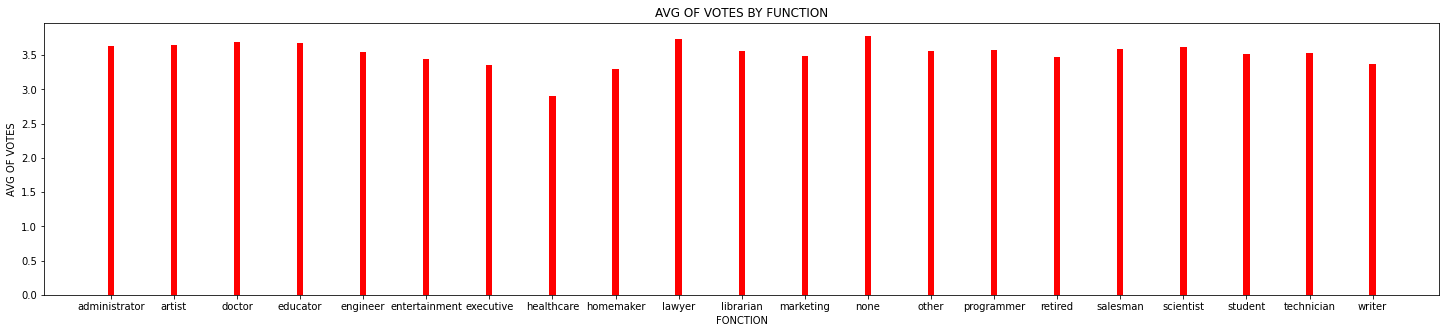

In [23]:
d=full_data.groupby('occupation').rating.mean()
m=d.reset_index().rename(columns={full_data.index.name:'mean rating'})
f=plt.figure(figsize=(25,5))
plt.bar(m.occupation,m.rating,color='red',width=0.1)
plt.xlabel('FONCTION')
plt.ylabel('AVG OF VOTES')
plt.title('AVG OF VOTES BY FUNCTION')
plt.show()


<h1> TP3 </h1>

In [24]:
mx = original_matrix.fillna(0)
def standardize(row):
    new_row = (row - row.mean()) / (row.max() - row.min())
    return (new_row)
     
mx = mx.apply(standardize)
mx[mx< 0] = 0
mx

item_id      1         2       3        4         5         6         7     \
user_id                                                                      
1        0.628208  0.510923  0.7421  0.44263  0.539767  0.980276  0.484199   
2        0.428208  0.000000  0.0000  0.00000  0.000000  0.000000  0.000000   
3        0.000000  0.000000  0.0000  0.00000  0.000000  0.000000  0.000000   
4        0.000000  0.000000  0.0000  0.00000  0.000000  0.000000  0.000000   
5        0.428208  0.510923  0.0000  0.00000  0.000000  0.000000  0.000000   
...           ...       ...     ...      ...       ...       ...       ...   
939      0.000000  0.000000  0.0000  0.00000  0.000000  0.000000  0.000000   
940      0.000000  0.000000  0.0000  0.24263  0.000000  0.000000  0.484199   
941      0.628208  0.000000  0.0000  0.00000  0.000000  0.000000  0.484199   
942      0.000000  0.000000  0.0000  0.00000  0.000000  0.000000  0.000000   
943      0.000000  0.910923  0.0000  0.00000  0.000000  0.000000  0.000000   

item_id      8         9         10    ...  1673  1674  1675  1676  1677  \
user_id                                ...                                 
1        0.014422  0.752916  0.527678  ...   0.0   0.0   0.0   0.0   0.0   
2        0.000000  0.000000  0.327678  ...   0.0   0.0   0.0   0.0   0.0   
3        0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   
4        0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   
5        0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   
...           ...       ...       ...  ...   ...   ...   ...   ...   ...   
939      0.000000  0.752916  0.000000  ...   0.0   0.0   0.0   0.0   0.0   
940      0.814422  0.352916  0.000000  ...   0.0   0.0   0.0   0.0   0.0   
941      0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   
942      0.000000  0.000000  0.000000  ...   0.0   0.0   0.0   0.0   0.0   
943      0.000000  0.352916  0.000000  ...   0.0   0.0   0.0   0.0   0.0   

item_id  1678  1679  1680  1681  1682  
user_id                                
1         0.0   0.0   0.0   0.0   0.0  
2         0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   0.0  
4         0.0   0.0   0.0   0.0   0.0  
5         0.0   0.0   0.0   0.0   0.0  
...       ...   ...   ...   ...   ...  
939       0.0   0.0   0.0   0.0   0.0  
940       0.0   0.0   0.0   0.0   0.0  
941       0.0   0.0   0.0   0.0   0.0  
942       0.0   0.0   0.0   0.0   0.0  
943       0.0   0.0   0.0   0.0   0.0  

[943 rows x 1682 columns]

In [25]:
user_similarity_matrix= mx.corr(method='pearson',min_periods=7)
user_similarity_matrix=pd.DataFrame(user_similarity_matrix,index=mx.index, columns=mx.index)
user_similarity_matrix[user_similarity_matrix< 0] = 0
user_similarity_matrix

user_id       1         2         3         4         5         6         7    \
user_id                                                                         
1        1.000000  0.212243  0.160908  0.198280  0.127519  0.016047  0.295698   
2        0.212243  1.000000  0.184958  0.395359  0.236116  0.027552  0.202600   
3        0.160908  0.184958  1.000000  0.216475  0.138212  0.063609  0.251035   
4        0.198280  0.395359  0.216475  1.000000  0.223235  0.014943  0.282711   
5        0.127519  0.236116  0.138212  0.223235  1.000000  0.000000  0.192133   
...           ...       ...       ...       ...       ...       ...       ...   
939      0.151944  0.235229  0.176451  0.295454  0.322331  0.015479  0.170256   
940      0.098151  0.260727  0.262618  0.236717  0.155560  0.000000  0.152474   
941      0.118160  0.260428  0.134807  0.225291  0.178259  0.000000  0.045175   
942      0.117245  0.189668  0.081068  0.222103  0.175427  0.111591  0.135735   
943      0.078382  0.178796  0.303594  0.246493  0.208202  0.021188  0.216344   

user_id       8         9         10   ...       934       935       936  \
user_id                                ...                                 
1        0.248452  0.173080  0.086953  ...  0.170469  0.026697  0.030162   
2        0.199228  0.069809  0.069373  ...  0.112553  0.000000  0.021953   
3        0.067586  0.138459  0.074370  ...  0.043152  0.079387  0.025627   
4        0.345030  0.230589  0.134035  ...  0.053663  0.000000  0.044840   
5        0.139858  0.137956  0.000000  ...  0.120170  0.000000  0.000000   
...           ...       ...       ...  ...       ...       ...       ...   
939      0.136831  0.185939  0.015800  ...  0.153029  0.014495  0.045061   
940      0.078013  0.000000  0.033977  ...  0.037464  0.000000  0.000000   
941      0.087523  0.066807  0.000000  ...  0.139314  0.000000  0.016753   
942      0.248854  0.154980  0.072469  ...  0.086073  0.038707  0.068777   
943      0.078405  0.130792  0.038809  ...  0.000000  0.000000  0.000000   

user_id      937       938       939       940       941       942       943  
user_id                                                                       
1        0.00000  0.000000  0.151944  0.098151  0.118160  0.117245  0.078382  
2        0.00000  0.000000  0.235229  0.260727  0.260428  0.189668  0.178796  
3        0.00000  0.000000  0.176451  0.262618  0.134807  0.081068  0.303594  
4        0.00000  0.000000  0.295454  0.236717  0.225291  0.222103  0.246493  
5        0.00000  0.000000  0.322331  0.155560  0.178259  0.175427  0.208202  
...          ...       ...       ...       ...       ...       ...       ...  
939      0.00000  0.000000  1.000000  0.132389  0.227911  0.288371  0.168348  
940      0.00000  0.000000  0.132389  1.000000  0.140557  0.071996  0.196478  
941      0.00000  0.021762  0.227911  0.140557  1.000000  0.123114  0.126260  
942      0.01525  0.058468  0.288371  0.071996  0.123114  1.000000  0.129278  
943      0.00000  0.000000  0.168348  0.196478  0.126260  0.129278  1.000000  

[943 rows x 943 columns]

In [26]:
def display_top_k(k,similarity_matrix):
    for r in  range(len(similarity_matrix)):
        user = similarity_matrix.iloc[r]
        print(f'## USER {r+1} ##')
        print('___________________')
        for us in user.sort_values()[-k-1:][::-1][1:].index:
            print(f'- User {us}  | similarity {similarity_matrix.iloc[r][us]}')
        print('___________________')

In [27]:
display_top_k(3,user_similarity_matrix)

## USER 1 ##
___________________
- User 50  | similarity 0.4119670253008524
- User 121  | similarity 0.4021889971204229
- User 95  | similarity 0.4016481694053579
___________________
## USER 2 ##
___________________
- User 233  | similarity 0.601132538238929
- User 576  | similarity 0.5542203795757956
- User 161  | similarity 0.5421953443094958
___________________
## USER 3 ##
___________________
- User 410  | similarity 0.38845882422377315
- User 763  | similarity 0.38087213291597727
- User 42  | similarity 0.35631690559674245
___________________
## USER 4 ##
___________________
- User 56  | similarity 0.5129469249062434
- User 202  | similarity 0.48510337127409436
- User 204  | similarity 0.4836432183464491
___________________
## USER 5 ##
___________________
- User 218  | similarity 0.4879890163863058
- User 219  | similarity 0.41732421138555903
- User 54  | similarity 0.41696777437962956
___________________
## USER 6 ##
___________________
- User 766  | similarity 0.271488313993431

- User 127  | similarity 0.5647047970058414
- User 182  | similarity 0.5269789748601915
- User 23  | similarity 0.4972785748029182
___________________
## USER 188 ##
___________________
- User 182  | similarity 0.5096190495824675
- User 195  | similarity 0.5014790908512275
- User 89  | similarity 0.48569581258147665
___________________
## USER 189 ##
___________________
- User 169  | similarity 0.6888793984458026
- User 408  | similarity 0.6114596344987636
- User 114  | similarity 0.4498395058630506
___________________
## USER 190 ##
___________________
- User 83  | similarity 0.47198237629674183
- User 86  | similarity 0.43124025206220407
- User 213  | similarity 0.37910009014541746
___________________
## USER 191 ##
___________________
- User 196  | similarity 0.4887753107321496
- User 69  | similarity 0.4829493776904723
- User 357  | similarity 0.4810982299809433
___________________
## USER 192 ##
___________________
- User 23  | similarity 0.5036073872991754
- User 182  | similarit

- User 77  | similarity 0.5358144474320878
- User 566  | similarity 0.4666796404108954
___________________
## USER 357 ##
___________________
- User 180  | similarity 0.5149774286875336
- User 191  | similarity 0.4810982299809433
- User 527  | similarity 0.47103451562334364
___________________
## USER 358 ##
___________________
- User 890  | similarity 0.3659382085839659
- User 343  | similarity 0.27254995866136544
- User 271  | similarity 0.2655881061902312
___________________
## USER 359 ##
___________________
- User 360  | similarity 0.3751675029770264
- User 341  | similarity 0.35915392665969
- User 897  | similarity 0.28031266278897216
___________________
## USER 360 ##
___________________
- User 897  | similarity 0.5666366572766841
- User 359  | similarity 0.3751675029770264
- User 907  | similarity 0.36946450607449915
___________________
## USER 361 ##
___________________
- User 329  | similarity 0.2870649776351835
- User 359  | similarity 0.24911276196905907
- User 938  | simil

- User 576  | similarity 0.46185649440114895
- User 226  | similarity 0.38555090479597404
- User 578  | similarity 0.36718272888086234
___________________
## USER 563 ##
___________________
- User 565  | similarity 0.5138583299975363
- User 551  | similarity 0.484862855766683
- User 452  | similarity 0.46696208377214043
___________________
## USER 564 ##
___________________
- User 452  | similarity 0.40214454898513274
- User 817  | similarity 0.36075718784237465
- User 565  | similarity 0.33846228449669835
___________________
## USER 565 ##
___________________
- User 444  | similarity 0.5259937107940275
- User 563  | similarity 0.5138583299975363
- User 668  | similarity 0.45444453470840174
___________________
## USER 566 ##
___________________
- User 550  | similarity 0.5957768193376319
- User 226  | similarity 0.5953040978860247
- User 385  | similarity 0.5946587681613905
___________________
## USER 567 ##
___________________
- User 672  | similarity 0.4614598283437315
- User 219  | 

___________________
- User 747  | similarity 0.3898380118375554
- User 785  | similarity 0.36991930535082534
- User 387  | similarity 0.3484393868006746
___________________
## USER 779 ##
___________________
- User 802  | similarity 0.5710957315312203
- User 769  | similarity 0.43501341620468376
- User 578  | similarity 0.4338893973876913
___________________
## USER 780 ##
___________________
- User 67  | similarity 0.6269452289587166
- User 80  | similarity 0.5771886803111705
- User 790  | similarity 0.5735930242199939
___________________
## USER 781 ##
___________________
- User 66  | similarity 0.5015622683246708
- User 49  | similarity 0.47230824777726577
- User 722  | similarity 0.4616273558057842
___________________
## USER 782 ##
___________________
- User 867  | similarity 0.4495613241868441
- User 913  | similarity 0.42137291298301166
- User 910  | similarity 0.4080650834805467
___________________
## USER 783 ##
___________________
- User 775  | similarity 0.5807795227934518
-

In [28]:
def k_similar(k,user,item_id,similarity_matrix):
    user = similarity_matrix.iloc[user]
    user = user[user.index.isin(mx[item_id][mx[item_id]!=0].index)]
    return user.sort_values()[-k-1:][::-1][1:]
k_similar(3,1,19,user_similarity_matrix)

user_id
227    0.468726
79     0.431515
144    0.421021
Name: 2, dtype: float64

In [29]:
def calculate_ratings(id_movie, id_user,k):
    cosine_scores = k_similar(k,id_user,id_movie,user_similarity_matrix)
    ratings_scores = mx[id_movie][mx[id_movie].index.isin(cosine_scores.index)]       
    index_not_rated = ratings_scores[ratings_scores.isnull()].index
    ratings_scores = ratings_scores.dropna()
    cosine_scores = cosine_scores.drop(index_not_rated)
    cosine_scores
    ratings_movie = np.dot(ratings_scores, cosine_scores)/cosine_scores.sum()
    return  ratings_movie

In [33]:
len(mat)

943

In [59]:
mat=np.array(mx)
print('###################################')
users = {}
for i,m in enumerate(mat):
    if i+1 == len(mat):
        break
    print(f' ---- USER {i+1}  Ratting PREDECTION----\n')
    
    rates = {}
    for j,v in enumerate(m):
        #print(f'   -- MOVIE {j+1}  Ratting PREDECTION----\n')
        if v != 0.0 :
            rates[j+1] = calculate_ratings(j+1,i+1,3)
    users[i+1]=rates
    
print('###################################')

###################################
 ---- USER 1  Ratting PREDECTION----

 ---- USER 2  Ratting PREDECTION----

 ---- USER 3  Ratting PREDECTION----

 ---- USER 4  Ratting PREDECTION----

 ---- USER 5  Ratting PREDECTION----



/tmp/ipykernel_371993/1334437920.py:8: RuntimeWarning: invalid value encountered in double_scalars
  ratings_movie = np.dot(ratings_scores, cosine_scores)/cosine_scores.sum()


 ---- USER 6  Ratting PREDECTION----

 ---- USER 7  Ratting PREDECTION----

 ---- USER 8  Ratting PREDECTION----

 ---- USER 9  Ratting PREDECTION----

 ---- USER 10  Ratting PREDECTION----

 ---- USER 11  Ratting PREDECTION----

 ---- USER 12  Ratting PREDECTION----

 ---- USER 13  Ratting PREDECTION----

 ---- USER 14  Ratting PREDECTION----

 ---- USER 15  Ratting PREDECTION----

 ---- USER 16  Ratting PREDECTION----

 ---- USER 17  Ratting PREDECTION----

 ---- USER 18  Ratting PREDECTION----

 ---- USER 19  Ratting PREDECTION----

 ---- USER 20  Ratting PREDECTION----

 ---- USER 21  Ratting PREDECTION----

 ---- USER 22  Ratting PREDECTION----

 ---- USER 23  Ratting PREDECTION----

 ---- USER 24  Ratting PREDECTION----

 ---- USER 25  Ratting PREDECTION----

 ---- USER 26  Ratting PREDECTION----

 ---- USER 27  Ratting PREDECTION----

 ---- USER 28  Ratting PREDECTION----

 ---- USER 29  Ratting PREDECTION----

 ---- USER 30  Ratting PREDECTION----

 ---- USER 31  Ratting PREDEC

 ---- USER 215  Ratting PREDECTION----

 ---- USER 216  Ratting PREDECTION----

 ---- USER 217  Ratting PREDECTION----

 ---- USER 218  Ratting PREDECTION----

 ---- USER 219  Ratting PREDECTION----

 ---- USER 220  Ratting PREDECTION----

 ---- USER 221  Ratting PREDECTION----

 ---- USER 222  Ratting PREDECTION----

 ---- USER 223  Ratting PREDECTION----

 ---- USER 224  Ratting PREDECTION----

 ---- USER 225  Ratting PREDECTION----

 ---- USER 226  Ratting PREDECTION----

 ---- USER 227  Ratting PREDECTION----

 ---- USER 228  Ratting PREDECTION----

 ---- USER 229  Ratting PREDECTION----

 ---- USER 230  Ratting PREDECTION----

 ---- USER 231  Ratting PREDECTION----

 ---- USER 232  Ratting PREDECTION----

 ---- USER 233  Ratting PREDECTION----

 ---- USER 234  Ratting PREDECTION----

 ---- USER 235  Ratting PREDECTION----

 ---- USER 236  Ratting PREDECTION----

 ---- USER 237  Ratting PREDECTION----

 ---- USER 238  Ratting PREDECTION----

 ---- USER 239  Ratting PREDECTION----



 ---- USER 423  Ratting PREDECTION----

 ---- USER 424  Ratting PREDECTION----

 ---- USER 425  Ratting PREDECTION----

 ---- USER 426  Ratting PREDECTION----

 ---- USER 427  Ratting PREDECTION----

 ---- USER 428  Ratting PREDECTION----

 ---- USER 429  Ratting PREDECTION----

 ---- USER 430  Ratting PREDECTION----

 ---- USER 431  Ratting PREDECTION----

 ---- USER 432  Ratting PREDECTION----

 ---- USER 433  Ratting PREDECTION----

 ---- USER 434  Ratting PREDECTION----

 ---- USER 435  Ratting PREDECTION----

 ---- USER 436  Ratting PREDECTION----

 ---- USER 437  Ratting PREDECTION----

 ---- USER 438  Ratting PREDECTION----

 ---- USER 439  Ratting PREDECTION----

 ---- USER 440  Ratting PREDECTION----

 ---- USER 441  Ratting PREDECTION----

 ---- USER 442  Ratting PREDECTION----

 ---- USER 443  Ratting PREDECTION----

 ---- USER 444  Ratting PREDECTION----

 ---- USER 445  Ratting PREDECTION----

 ---- USER 446  Ratting PREDECTION----

 ---- USER 447  Ratting PREDECTION----



 ---- USER 628  Ratting PREDECTION----

 ---- USER 629  Ratting PREDECTION----

 ---- USER 630  Ratting PREDECTION----

 ---- USER 631  Ratting PREDECTION----

 ---- USER 632  Ratting PREDECTION----

 ---- USER 633  Ratting PREDECTION----

 ---- USER 634  Ratting PREDECTION----

 ---- USER 635  Ratting PREDECTION----

 ---- USER 636  Ratting PREDECTION----

 ---- USER 637  Ratting PREDECTION----

 ---- USER 638  Ratting PREDECTION----

 ---- USER 639  Ratting PREDECTION----

 ---- USER 640  Ratting PREDECTION----

 ---- USER 641  Ratting PREDECTION----

 ---- USER 642  Ratting PREDECTION----

 ---- USER 643  Ratting PREDECTION----

 ---- USER 644  Ratting PREDECTION----

 ---- USER 645  Ratting PREDECTION----

 ---- USER 646  Ratting PREDECTION----

 ---- USER 647  Ratting PREDECTION----

 ---- USER 648  Ratting PREDECTION----

 ---- USER 649  Ratting PREDECTION----

 ---- USER 650  Ratting PREDECTION----

 ---- USER 651  Ratting PREDECTION----

 ---- USER 652  Ratting PREDECTION----



 ---- USER 833  Ratting PREDECTION----

 ---- USER 834  Ratting PREDECTION----

 ---- USER 835  Ratting PREDECTION----

 ---- USER 836  Ratting PREDECTION----

 ---- USER 837  Ratting PREDECTION----

 ---- USER 838  Ratting PREDECTION----

 ---- USER 839  Ratting PREDECTION----

 ---- USER 840  Ratting PREDECTION----

 ---- USER 841  Ratting PREDECTION----

 ---- USER 842  Ratting PREDECTION----

 ---- USER 843  Ratting PREDECTION----

 ---- USER 844  Ratting PREDECTION----

 ---- USER 845  Ratting PREDECTION----

 ---- USER 846  Ratting PREDECTION----

 ---- USER 847  Ratting PREDECTION----

 ---- USER 848  Ratting PREDECTION----

 ---- USER 849  Ratting PREDECTION----

 ---- USER 850  Ratting PREDECTION----

 ---- USER 851  Ratting PREDECTION----

 ---- USER 852  Ratting PREDECTION----

 ---- USER 853  Ratting PREDECTION----

 ---- USER 854  Ratting PREDECTION----

 ---- USER 855  Ratting PREDECTION----

 ---- USER 856  Ratting PREDECTION----

 ---- USER 857  Ratting PREDECTION----



In [60]:
for u in users:
    print(f'#### \t USER {u} \t ####')
    for j in users[u]:
        print(f' - Movie {j} : {users[u][j]}')

#### 	 USER 1 	 ####
 - Movie 1 : 0.29115999245473984
 - Movie 2 : 0.572018949543325
 - Movie 3 : 0.46405818208778565
 - Movie 4 : 0.3809192373788544
 - Movie 5 : 0.6719376650557275
 - Movie 6 : 0.704318771194542
 - Movie 7 : 0.5496286263288725
 - Movie 8 : 0.814422057264051
 - Movie 9 : 0.42144015223498427
 - Movie 10 : 0.7971328280120679
 - Movie 11 : 0.5435400523616586
 - Movie 12 : 0.5541657595644749
 - Movie 13 : 0.6054450208420716
 - Movie 14 : 0.6460233297985154
 - Movie 15 : 0.2945544250287462
 - Movie 16 : 0.5053451299445438
 - Movie 17 : 0.8680010853441581
 - Movie 18 : 0.4550716526942498
 - Movie 19 : 0.8130509132385147
 - Movie 20 : 0.7478260869565218
 - Movie 21 : 0.15079533404029694
 - Movie 22 : 0.6092945717300465
 - Movie 23 : 0.706620517727695
 - Movie 24 : 0.6727465535524921
 - Movie 25 : 0.45671349074965706
 - Movie 26 : 0.6236663241991324
 - Movie 27 : 0.8243776865762775
 - Movie 28 : 0.5698833510074232
 - Movie 29 : 0.467665952889925
 - Movie 30 : 0.854049505892321

 - Movie 150 : 0.8120964243225278
 - Movie 152 : 0.7367974549310712
 - Movie 153 : 0.6649804825906815
 - Movie 154 : 0.7339307572593252
 - Movie 155 : 0.5466617551914645
 - Movie 157 : 0.5665340366746416
 - Movie 158 : 0.5667020148462355
 - Movie 160 : 0.608597889870494
 - Movie 161 : 0.6493355969319906
 - Movie 163 : 0.543300597482688
 - Movie 164 : 0.6775145916133963
 - Movie 165 : 0.6054313773056411
 - Movie 166 : 0.7657651841915791
 - Movie 167 : 0.6308862400351691
 - Movie 168 : 0.5899562606182935
 - Movie 170 : 0.8251882909899202
 - Movie 172 : 0.5254245742030794
 - Movie 173 : 0.3012843578919677
 - Movie 174 : 0.4922753539891158
 - Movie 175 : 0.6962450645107104
 - Movie 176 : 0.4166174357105397
 - Movie 177 : 0.6899346289987629
 - Movie 178 : 0.6848356309650053
 - Movie 179 : 0.5536757630719757
 - Movie 180 : 0.5486809055338211
 - Movie 181 : 0.4362463524201098
 - Movie 182 : 0.6135486076243948
 - Movie 183 : 0.5647691908174929
 - Movie 184 : 0.29953252684692483
 - Movie 185 : 

 - Movie 118 : 0.3285163286411808
 - Movie 121 : 0.41741501806060016
 - Movie 123 : 0.6543299590488031
 - Movie 148 : 0.7033060038375435
 - Movie 244 : 0.49696863382843354
 - Movie 246 : 0.8965005302226936
 - Movie 281 : 0.4961391678032689
 - Movie 286 : 0.3624510602778044
 - Movie 288 : 0.3967082357422737
 - Movie 295 : 0.5444326617179215
 - Movie 298 : 0.7788490364873638
 - Movie 325 : 0.7383013625914286
 - Movie 370 : 0.6945396041480436
 - Movie 475 : 0.5995303083931746
 - Movie 508 : 0.35367509847044465
 - Movie 515 : 0.5557014173510335
 - Movie 596 : 0.568941529919917
 - Movie 742 : 0.6602049068351654
 - Movie 925 : 0.5869074245038377
 - Movie 930 : 0.3444105260849582
 - Movie 978 : 0.4327021538452595
 - Movie 1017 : 0.5010948224132964
#### 	 USER 28 	 ####
 - Movie 5 : 0.6111430656703464
 - Movie 7 : 0.4840579822305356
 - Movie 11 : 0.6085688661902358
 - Movie 12 : 0.6818020911541663
 - Movie 28 : 0.4348107139608299
 - Movie 31 : 0.4157866966986317
 - Movie 50 : 0.331310581399467

 - Movie 202 : 0.7110281787120647
 - Movie 208 : 0.5728031504445341
 - Movie 209 : 0.5124418794603194
 - Movie 213 : 0.5431106537213493
 - Movie 217 : 0.4580793763535456
 - Movie 218 : 0.5538930958513578
 - Movie 219 : 0.3351206943248809
 - Movie 225 : 0.20158369864073827
 - Movie 231 : 0.31919406150583246
 - Movie 235 : 0.6109280135674083
 - Movie 238 : 0.5863698591509858
 - Movie 239 : 0.6747734764545725
 - Movie 240 : 0.32410015415707993
 - Movie 256 : 0.8499031069596729
 - Movie 262 : 0.6796860798194256
 - Movie 268 : 0.7330766215578999
 - Movie 270 : 0.5685040184943474
 - Movie 283 : 0.5280614049929515
 - Movie 287 : 0.6082863980573672
 - Movie 289 : 0.3621506560301924
 - Movie 290 : 0.7512728399992202
 - Movie 299 : 0.6304142240868527
 - Movie 301 : 0.7115569478525865
 - Movie 302 : 0.7378579003181337
 - Movie 312 : 0.41022802136003156
 - Movie 313 : 0.40990559990348013
 - Movie 320 : 0.8367752888834464
 - Movie 324 : 0.7173262139457269
 - Movie 325 : 0.42700239799760603
 - Movie

 - Movie 651 : 0.7854810678135402
 - Movie 655 : 0.8131495227995761
 - Movie 660 : 0.8089716698029613
 - Movie 661 : 0.7908044989350197
 - Movie 676 : 0.6829875936874178
 - Movie 735 : 0.5540951546853337
 - Movie 736 : 0.8678242783818245
 - Movie 778 : 0.5959993480107248
 - Movie 806 : 0.5613105578122726
 - Movie 956 : 0.5647932131495227
 - Movie 1041 : 0.6861352160932005
 - Movie 1044 : 0.706468891498914
 - Movie 1129 : 0.6503469446554191
 - Movie 1142 : 0.7158513156170839
#### 	 USER 66 	 ####
 - Movie 1 : 0.36362458583506696
 - Movie 7 : 0.48419936373276773
 - Movie 9 : 0.562738156929614
 - Movie 15 : 0.5106813863329946
 - Movie 21 : 0.2688658722324844
 - Movie 24 : 0.6132853402280247
 - Movie 50 : 0.26074904906889684
 - Movie 117 : 0.5642971484241873
 - Movie 121 : 0.22095268194627737
 - Movie 127 : 0.5611810202067039
 - Movie 181 : 0.3069656044312094
 - Movie 237 : 0.4257771378090946
 - Movie 248 : 0.6132222322148786
 - Movie 249 : 0.6484923033852383
 - Movie 257 : 0.4947262042014

 - Movie 62 : 0.38430818118859816
 - Movie 63 : 0.4808595990539423
 - Movie 64 : 0.7331919406150583
 - Movie 66 : 0.3490466326067648
 - Movie 67 : 0.6620728520908791
 - Movie 68 : 0.4959434152365939
 - Movie 70 : 0.47321945711665553
 - Movie 72 : 0.4494049451227258
 - Movie 73 : 0.7656538275266487
 - Movie 79 : 0.44316400623182256
 - Movie 80 : 0.35849375066549183
 - Movie 82 : 0.44918000396294994
 - Movie 87 : 0.5536344929307149
 - Movie 88 : 0.5072787564503525
 - Movie 89 : 0.7586426299045598
 - Movie 90 : 0.3384526281904037
 - Movie 94 : 0.30859189934499953
 - Movie 96 : 0.6824750455010387
 - Movie 97 : 0.6570064979114993
 - Movie 100 : 0.4842123782283987
 - Movie 111 : 0.5989395546129375
 - Movie 118 : 0.3993559916358234
 - Movie 120 : 0.368186638388123
 - Movie 121 : 0.3588645759478408
 - Movie 127 : 0.35543099857267735
 - Movie 128 : 0.750642218064868
 - Movie 132 : 0.6521418542390289
 - Movie 134 : 0.5477296687788126
 - Movie 135 : 0.45085596365859076
 - Movie 144 : 0.4641446575

#### 	 USER 107 	 ####
 - Movie 258 : 0.4537929785855292
 - Movie 259 : 0.5725512770750002
 - Movie 264 : 0.5463718730196269
 - Movie 268 : 0.3949098621420996
 - Movie 269 : 0.6036527832387059
 - Movie 271 : 0.4591638940220124
 - Movie 286 : 0.3644530629116702
 - Movie 288 : 0.247730429930873
 - Movie 302 : 0.3341390425354034
 - Movie 305 : 0.5367992948064189
 - Movie 312 : 0.49037788359446444
 - Movie 313 : 0.48781028606609467
 - Movie 321 : 0.6220128707489833
 - Movie 322 : 0.39904947342033376
 - Movie 323 : 0.32077947566435844
 - Movie 325 : 0.6576312190313186
 - Movie 327 : 0.6072379255605466
 - Movie 333 : 0.40528853116815283
 - Movie 340 : 0.7929305705139771
 - Movie 902 : 0.6595814914981987
 - Movie 1243 : 0.6434356009299739
#### 	 USER 108 	 ####
 - Movie 1 : 0.3591663127086133
 - Movie 7 : 0.5484373403034712
 - Movie 10 : 0.8577314511769739
 - Movie 13 : 0.3987420258178635
 - Movie 14 : 0.5169045795055696
 - Movie 21 : 0.5507953340402969
 - Movie 50 : 0.3916789333623224
 - Mov

 - Movie 740 : 0.6234088934252257
 - Movie 742 : 0.5263725177894815
 - Movie 744 : 0.7316014098317597
 - Movie 792 : 0.6750906385241549
 - Movie 937 : 0.7100545633427322
 - Movie 1194 : 0.60802650388811
 - Movie 1266 : 0.7916872211922712
#### 	 USER 122 	 ####
 - Movie 11 : 0.3935574606307055
 - Movie 28 : 0.6354692372208162
 - Movie 46 : 0.5862989147931814
 - Movie 57 : 0.7009019086353977
 - Movie 69 : 0.6020313836922568
 - Movie 70 : 0.46664765288643656
 - Movie 83 : 0.780717910148053
 - Movie 86 : 0.8058723838684212
 - Movie 127 : 0.6248144220572642
 - Movie 135 : 0.6510387967312202
 - Movie 175 : 0.6959868449860002
 - Movie 180 : 0.6757137209141583
 - Movie 187 : 0.6795444126983449
 - Movie 190 : 0.7634220542426875
 - Movie 191 : 0.6234508744727916
 - Movie 193 : 0.8050467876318186
 - Movie 197 : 0.6581760532699845
 - Movie 212 : 0.8045102047162993
 - Movie 214 : 0.5162043959480386
 - Movie 215 : 0.6337221633085897
 - Movie 239 : 0.6826269703017208
 - Movie 269 : 0.6024808969325769

 - Movie 953 : 0.7892389282807867
 - Movie 956 : 0.6240659808672411
 - Movie 962 : 0.5307714473583837
 - Movie 965 : 0.792430687918008
 - Movie 966 : 0.8333024510938749
 - Movie 969 : 0.59239066608521
 - Movie 971 : 0.7131931229994227
 - Movie 972 : 0.5811240721102864
 - Movie 1006 : 0.6126086521773005
 - Movie 1017 : 0.49340978032676647
 - Movie 1039 : 0.7917076322951851
 - Movie 1041 : 0.3623412028614131
 - Movie 1044 : 0.4998003037883007
 - Movie 1047 : 0.3810584792397331
 - Movie 1050 : 0.6997259131579112
 - Movie 1065 : 0.8275822755128023
 - Movie 1070 : 0.8473144405591966
 - Movie 1074 : 0.41957682915794964
 - Movie 1098 : 0.6376135069358762
 - Movie 1101 : 0.8740620877978816
 - Movie 1109 : 0.4462483787200569
 - Movie 1113 : 0.5847295864262991
 - Movie 1197 : 0.7007538145472009
 - Movie 1203 : 0.8509543583661636
 - Movie 1264 : 0.8287290036044306
 - Movie 1269 : 0.8677602317890255
 - Movie 1286 : 0.5949110554841887
 - Movie 1297 : 0.5246382755397694
 - Movie 1298 : 0.91163869304

 - Movie 1067 : 0.5880916331437088
 - Movie 1110 : 0.512690983336774
 - Movie 1218 : 0.7167838977713853
#### 	 USER 178 	 ####
 - Movie 1 : 0.6282078472958643
 - Movie 2 : 0.44459655149105
 - Movie 7 : 0.6841993637327677
 - Movie 8 : 0.814422057264051
 - Movie 9 : 0.48731241408078213
 - Movie 11 : 0.7426763985023355
 - Movie 12 : 0.6842370958753492
 - Movie 15 : 0.6332599191090778
 - Movie 16 : 0.5368577716845654
 - Movie 22 : 0.7384941675503711
 - Movie 24 : 0.47095784504215643
 - Movie 25 : 0.7200233847931389
 - Movie 28 : 0.4340490501275961
 - Movie 31 : 0.6814422057264052
 - Movie 38 : 0.5747227744629867
 - Movie 39 : 0.539165298170833
 - Movie 50 : 0.4610816542948039
 - Movie 51 : 0.5468103628526679
 - Movie 55 : 0.6829268292682926
 - Movie 56 : 0.5913902348673878
 - Movie 58 : 0.5989702018753256
 - Movie 62 : 0.7238367903780298
 - Movie 64 : 0.6145356680173946
 - Movie 66 : 0.5431811941663586
 - Movie 69 : 0.6044456355750478
 - Movie 70 : 0.5337511565213056
 - Movie 71 : 0.626661

 - Movie 570 : 0.5713226591393861
 - Movie 576 : 0.40522490291038316
 - Movie 578 : 0.538494167550371
 - Movie 586 : 0.7452986389707131
 - Movie 651 : 0.7854862183209317
 - Movie 665 : 0.5405306844778495
 - Movie 678 : 0.40425488581860236
 - Movie 679 : 0.5308589607635207
 - Movie 684 : 0.664050901378579
 - Movie 688 : 0.32005031326280037
 - Movie 690 : 0.21803034533624172
 - Movie 720 : 0.8126038897994858
 - Movie 748 : 0.323577487974737
 - Movie 750 : 0.7627297733812055
 - Movie 751 : 0.3307671954625935
 - Movie 770 : 0.6987232710645823
 - Movie 779 : 0.5587601122679832
 - Movie 802 : 0.5620626666206652
 - Movie 808 : 0.6455885260064097
 - Movie 849 : 0.5016724282131803
 - Movie 879 : 0.5049351239207871
 - Movie 880 : 0.6932162205540368
 - Movie 895 : 0.6573267259965884
 - Movie 947 : 0.628474779297001
 - Movie 1222 : 0.5209564646624308
 - Movie 1228 : 0.6232276202693703
 - Movie 1419 : 0.5929981330124888
 - Movie 1420 : 0.8182277227235906
#### 	 USER 198 	 ####
 - Movie 1 : 0.561049

 - Movie 134 : 0.5504912908029411
 - Movie 135 : 0.5819724284199362
 - Movie 137 : 0.7257631144151497
 - Movie 151 : 0.6205447185913702
 - Movie 154 : 0.6596304490798767
 - Movie 156 : 0.6765307060177518
 - Movie 166 : 0.8884908172482382
 - Movie 168 : 0.6606898039422839
 - Movie 169 : 0.5556174455782725
 - Movie 171 : 0.754061384189421
 - Movie 172 : 0.5440986372247382
 - Movie 173 : 0.4383886928683641
 - Movie 174 : 0.49256099141349735
 - Movie 175 : 0.5670210952844014
 - Movie 179 : 0.6878135155238672
 - Movie 180 : 0.5449433390408187
 - Movie 181 : 0.3770053835961166
 - Movie 182 : 0.4902442735482919
 - Movie 185 : 0.5258332627876131
 - Movie 187 : 0.7482811818478199
 - Movie 188 : 0.5347426439793254
 - Movie 191 : 0.6252689391260003
 - Movie 195 : 0.6167464681720086
 - Movie 196 : 0.6568616760119707
 - Movie 208 : 0.6343907477755352
 - Movie 209 : 0.7084971254231535
 - Movie 213 : 0.5486858275701401
 - Movie 216 : 0.36189256659674857
 - Movie 221 : 0.744398489126903
 - Movie 223 :

 - Movie 662 : 0.6749748554193306
 - Movie 663 : 0.7735866717143549
 - Movie 671 : 0.7086096485693437
 - Movie 673 : 0.5998983754988446
 - Movie 675 : 0.7669931697914366
 - Movie 686 : 0.827656423284959
 - Movie 692 : 0.8038814644648269
 - Movie 693 : 0.670619167451269
 - Movie 694 : 0.7853657725864936
 - Movie 699 : 0.665256058789084
 - Movie 702 : 0.48883281681018875
 - Movie 705 : 0.6102245992986293
 - Movie 709 : 0.7851368299939484
 - Movie 712 : 0.4873034476494189
 - Movie 724 : 0.6132380574476812
 - Movie 727 : 0.6196888076319743
 - Movie 731 : 0.650783072595396
 - Movie 732 : 0.7234453989909534
 - Movie 735 : 0.6821115186183759
 - Movie 739 : 0.6127860938995962
 - Movie 745 : 0.8625049279678427
 - Movie 746 : 0.8364640244049211
 - Movie 747 : 0.384170728491446
 - Movie 749 : 0.47775567313027517
 - Movie 751 : 0.546370812391695
 - Movie 765 : 0.6420981879298169
 - Movie 768 : 0.45836681071206836
 - Movie 770 : 0.6287509007758141
 - Movie 781 : 0.5406150583244962
 - Movie 782 : 0.

 - Movie 50 : 0.46108165429480386
 - Movie 55 : 0.38267119560228835
 - Movie 60 : 0.9454931071049842
 - Movie 64 : 0.6719313963861948
 - Movie 79 : 0.7117709437963945
 - Movie 100 : 0.4841318726424102
 - Movie 109 : 0.3059927553468294
 - Movie 111 : 0.3989395546129374
 - Movie 117 : 0.23652517745251556
 - Movie 118 : 0.39716643718795425
 - Movie 121 : 0.4775000546232939
 - Movie 125 : 0.5483748518076988
 - Movie 132 : 0.7872746553552491
 - Movie 144 : 0.6682423010788732
 - Movie 147 : 0.6520089185094515
 - Movie 148 : 0.5040820886673674
 - Movie 151 : 0.48345632757592705
 - Movie 172 : 0.672746553552492
 - Movie 181 : 0.4997115398688686
 - Movie 183 : 0.5504006489148127
 - Movie 185 : 0.5748671270832048
 - Movie 202 : 0.5753444431495454
 - Movie 210 : 0.542225751555007
 - Movie 222 : 0.6501831636655493
 - Movie 237 : 0.15627315408768708
 - Movie 248 : 0.6752916224814424
 - Movie 249 : 0.5222927438692164
 - Movie 250 : 0.5965626976929872
 - Movie 252 : 0.5682624643976139
 - Movie 257 : 

 - Movie 714 : 0.8164677847178566
 - Movie 729 : 0.6697700294632841
 - Movie 732 : 0.4878727534243782
 - Movie 735 : 0.41855232239009477
 - Movie 739 : 0.4133378184852025
 - Movie 742 : 0.568595400081624
 - Movie 744 : 0.6464742322007028
 - Movie 747 : 0.7281098028397717
 - Movie 750 : 0.5693362125085595
 - Movie 756 : 0.24633798752627936
 - Movie 763 : 0.48970018802335014
 - Movie 792 : 0.7940150063937925
 - Movie 815 : 0.5910012677426207
 - Movie 823 : 0.6092989975409712
 - Movie 845 : 0.44371590487576956
 - Movie 847 : 0.6930049757982674
 - Movie 864 : 0.5497882416909501
 - Movie 866 : 0.5170187146719898
 - Movie 882 : 0.6954007776064093
 - Movie 924 : 0.6022816079949054
 - Movie 951 : 0.5407424977170063
 - Movie 956 : 0.6927390331282006
 - Movie 963 : 0.9006611877376085
 - Movie 1028 : 0.5674788640769222
 - Movie 1046 : 0.44384169429853143
 - Movie 1091 : 0.5358590750693761
 - Movie 1101 : 0.50169966106484
 - Movie 1117 : 0.49758186980264457
 - Movie 1120 : 0.5678057102046131
 - Mo

 - Movie 331 : 0.5151643690349947
 - Movie 332 : 0.7596868528626036
 - Movie 333 : 0.21450166496418938
 - Movie 338 : 0.6056847326047228
 - Movie 342 : 0.756865008886081
 - Movie 538 : 0.7051596154004172
 - Movie 682 : 0.473627215306288
 - Movie 690 : 0.6850603552925405
 - Movie 748 : 0.5187413668744679
 - Movie 877 : 0.5159715833457287
 - Movie 938 : 0.6471811103902705
 - Movie 989 : 0.3761287733024924
#### 	 USER 282 	 ####
 - Movie 258 : 0.3893955461293744
 - Movie 262 : 0.7480381760339344
 - Movie 268 : 0.4040656014863858
 - Movie 269 : 0.39704581213589285
 - Movie 271 : 0.18720237096353862
 - Movie 288 : 0.373227366745775
 - Movie 294 : 0.2664346760569333
 - Movie 300 : 0.3963492971816921
 - Movie 302 : 0.6705481243393682
 - Movie 305 : 0.7380031469755941
 - Movie 307 : 0.38864050831960706
 - Movie 319 : 0.21141570209575866
 - Movie 325 : 0.6536364905102559
 - Movie 327 : 0.6746553552492044
 - Movie 333 : 0.47348420776612804
 - Movie 338 : 0.2785941863610383
 - Movie 340 : 0.31304

 - Movie 546 : 0.36485758867871154
 - Movie 574 : 0.5114052133441123
 - Movie 582 : 0.801549793075335
 - Movie 588 : 0.5704901570061555
 - Movie 596 : 0.6140794742829346
 - Movie 603 : 0.7010917904084856
 - Movie 625 : 0.6002319874471432
 - Movie 628 : 0.6754871639979917
 - Movie 629 : 0.7185633855677226
 - Movie 652 : 0.5353510580740675
 - Movie 659 : 0.7713887023232158
 - Movie 678 : 0.47098751227122865
 - Movie 687 : 0.5601715364665442
 - Movie 690 : 0.4997787169548841
 - Movie 692 : 0.6080163942079169
 - Movie 699 : 0.7194401785293026
 - Movie 705 : 0.6766200625051414
 - Movie 716 : 0.4302062921707077
 - Movie 724 : 0.5496125704350747
 - Movie 736 : 0.8681855186983924
 - Movie 742 : 0.39702746184008464
 - Movie 746 : 0.5901460476540313
 - Movie 748 : 0.32783687270091266
 - Movie 750 : 0.8318723702791394
 - Movie 751 : 0.5425931014676338
 - Movie 752 : 0.7049350498872397
 - Movie 864 : 0.478476522929197
 - Movie 919 : 0.4550796537531934
 - Movie 946 : 0.5212538794163906
 - Movie 984

 - Movie 173 : 0.44589043131877193
 - Movie 174 : 0.6212089077412511
 - Movie 175 : 0.49241583248263887
 - Movie 178 : 0.817932316815313
 - Movie 181 : 0.3267113162665343
 - Movie 183 : 0.6264078318569986
 - Movie 185 : 0.7306492775605999
 - Movie 186 : 0.6542820931610904
 - Movie 189 : 0.9425238600212088
 - Movie 193 : 0.6984684891659146
 - Movie 195 : 0.6869209338785489
 - Movie 196 : 0.5323439278837201
 - Movie 197 : 0.6641984468805386
 - Movie 200 : 0.6838168544501049
 - Movie 204 : 0.5153764581124072
 - Movie 209 : 0.38107666169710086
 - Movie 210 : 0.6445615834606965
 - Movie 214 : 0.6264735843539423
 - Movie 215 : 0.5545761732953376
 - Movie 222 : 0.2538353549343987
 - Movie 227 : 0.688016967126193
 - Movie 228 : 0.8025450689289501
 - Movie 229 : 0.6235701970770093
 - Movie 230 : 0.6729919450459995
 - Movie 239 : 0.5092157083198885
 - Movie 257 : 0.49354399321696457
 - Movie 258 : 0.4597207102595631
 - Movie 265 : 0.5589679321307759
 - Movie 269 : 0.6099471944021047
 - Movie 286

 - Movie 608 : 0.7749734888653235
 - Movie 653 : 0.7811830653529072
 - Movie 654 : 0.5295972530696904
 - Movie 655 : 0.5514148990215684
 - Movie 656 : 0.8252677841801414
 - Movie 751 : 0.47833089669975837
 - Movie 1019 : 0.6458089665687159
#### 	 USER 323 	 ####
 - Movie 7 : 0.41750910462314217
 - Movie 9 : 0.6905468889319397
 - Movie 11 : 0.6721455292819815
 - Movie 15 : 0.6299684002748438
 - Movie 22 : 0.4049051521393959
 - Movie 23 : 0.6409331919406153
 - Movie 50 : 0.4610816542948038
 - Movie 56 : 0.39199936949327135
 - Movie 64 : 0.7331919406150583
 - Movie 79 : 0.376493355368938
 - Movie 93 : 0.7722031050764117
 - Movie 98 : 0.44517497348886537
 - Movie 100 : 0.4769764193610373
 - Movie 117 : 0.3725109772499624
 - Movie 121 : 0.15769633814544762
 - Movie 127 : 0.49645089945471677
 - Movie 144 : 0.5343211840826422
 - Movie 150 : 0.6118902141176498
 - Movie 151 : 0.48029920302575346
 - Movie 156 : 0.5406516328317591
 - Movie 172 : 0.4910418555789256
 - Movie 179 : 0.490890223715212

 - Movie 428 : 0.6402033628339251
 - Movie 429 : 0.722526766153279
 - Movie 430 : 0.7218481428587724
 - Movie 433 : 0.7566070478647826
 - Movie 436 : 0.6602178406477168
 - Movie 443 : 0.7402297937164795
 - Movie 449 : 0.46459665735051037
 - Movie 450 : 0.49354861267732575
 - Movie 461 : 0.6805074351077129
 - Movie 462 : 0.6805938494167549
 - Movie 474 : 0.8250265111346765
 - Movie 475 : 0.46350971444237105
 - Movie 476 : 0.34671492704350004
 - Movie 479 : 0.7072721989362329
 - Movie 481 : 0.7777477919822641
 - Movie 483 : 0.6452047294404318
 - Movie 484 : 0.6767762460233296
 - Movie 485 : 0.6914011542660945
 - Movie 488 : 0.7925639525212288
 - Movie 494 : 0.8168488039926116
 - Movie 496 : 0.6602674763937049
 - Movie 498 : 0.6651113467656415
 - Movie 500 : 0.6493763073664928
 - Movie 502 : 0.5788681985400965
 - Movie 505 : 0.6820879964311778
 - Movie 506 : 0.7491510037742957
 - Movie 508 : 0.6360551431601272
 - Movie 510 : 0.7541748761955734
 - Movie 512 : 0.8703297186394227
 - Movie 51

 - Movie 208 : 0.6326617179215269
 - Movie 209 : 0.3757790073659715
 - Movie 210 : 0.5240721102863203
 - Movie 211 : 0.5632078504801198
 - Movie 213 : 0.6364687372265471
 - Movie 216 : 0.6330434564501362
 - Movie 221 : 0.8085595463215259
 - Movie 222 : 0.4523148984190464
 - Movie 238 : 0.5896076352067869
 - Movie 241 : 0.5691747421837463
 - Movie 242 : 0.7598339685205557
 - Movie 246 : 0.5340187711463656
 - Movie 248 : 0.7377934360870113
 - Movie 251 : 0.9584305408271473
 - Movie 255 : 0.39500282747766075
 - Movie 257 : 0.28849854508832345
 - Movie 258 : 0.3942069187716196
 - Movie 268 : 0.6734022554540274
 - Movie 269 : 0.6036051086425692
 - Movie 270 : 0.6367919672722265
 - Movie 272 : 0.5555226033687699
 - Movie 275 : 0.6394664949543776
 - Movie 276 : 0.4275998534649634
 - Movie 281 : 0.5355002781477985
 - Movie 283 : 0.6604453870625664
 - Movie 285 : 0.7781636115514682
 - Movie 286 : 0.4262062128716815
 - Movie 287 : 0.5897982895490208
 - Movie 292 : 0.7113467656415693
 - Movie 297

 - Movie 1210 : 0.3950784782018512
 - Movie 1215 : 0.31545413297130015
 - Movie 1217 : 0.31842769659835407
 - Movie 1218 : 0.7364049374612297
 - Movie 1248 : 0.6421784686616794
 - Movie 1277 : 0.8040103840600711
 - Movie 1322 : 0.5134591525647761
 - Movie 1407 : 0.8803116488658257
 - Movie 1513 : 0.9968186638388123
#### 	 USER 375 	 ####
 - Movie 5 : 0.679953365224524
 - Movie 39 : 0.6567773954742742
 - Movie 44 : 0.6574730263952997
 - Movie 77 : 0.49551691375817575
 - Movie 176 : 0.5660673098003207
 - Movie 183 : 0.48918939280396073
 - Movie 185 : 0.7263972466299415
 - Movie 218 : 0.6104787790426063
 - Movie 233 : 0.5232831546712948
 - Movie 234 : 0.5737313547480967
 - Movie 288 : 0.31558876873308805
 - Movie 300 : 0.3361833880121253
 - Movie 302 : 0.4034820293179412
 - Movie 356 : 0.7304347826086955
 - Movie 443 : 0.6691410392364793
 - Movie 525 : 0.6718737811887446
 - Movie 566 : 0.5258710477782911
 - Movie 573 : 0.4889824923724182
 - Movie 583 : 0.5984442604524429
 - Movie 603 : 0.

 - Movie 258 : 0.4549484012068323
 - Movie 264 : 0.4102236542131446
 - Movie 276 : 0.6286982348345951
 - Movie 282 : 0.5506414415732358
 - Movie 286 : 0.3580658235050918
 - Movie 288 : 0.45111346765641563
 - Movie 291 : 0.7823464012596653
 - Movie 294 : 0.4106758653511045
 - Movie 300 : 0.39905189179958306
 - Movie 301 : 0.6350539081047675
 - Movie 318 : 0.45460418893061855
 - Movie 322 : 0.4614107059918421
 - Movie 328 : 0.6512934334676842
 - Movie 334 : 0.48769576776378315
 - Movie 357 : 0.6281824257587909
 - Movie 378 : 0.3815821058411082
 - Movie 421 : 0.5893063742485503
 - Movie 427 : 0.5999060034549302
 - Movie 435 : 0.547102198175458
 - Movie 458 : 0.60942079055393
 - Movie 460 : 0.5611276385712461
 - Movie 462 : 0.8155984404083558
 - Movie 471 : 0.6307529162248143
 - Movie 474 : 0.6922215962084238
 - Movie 479 : 0.7735764499378436
 - Movie 480 : 0.7027077194886062
 - Movie 482 : 0.5589213639890361
 - Movie 483 : 0.6388439120081288
 - Movie 490 : 0.6930661106367699
 - Movie 491 

 - Movie 205 : 0.6387322942462859
 - Movie 206 : 0.4197411359041488
 - Movie 207 : 0.4595131504450074
 - Movie 208 : 0.49514108652696354
 - Movie 209 : 0.6417815482502652
 - Movie 210 : 0.4609966911487472
 - Movie 211 : 0.5038468139631445
 - Movie 212 : 0.45562188274454907
 - Movie 213 : 0.686744432661718
 - Movie 214 : 0.71898197242842
 - Movie 215 : 0.5601422386716997
 - Movie 216 : 0.6276448951746755
 - Movie 217 : 0.45648088214167054
 - Movie 218 : 0.6817014100998966
 - Movie 219 : 0.8032886273629856
 - Movie 226 : 0.3996594481435439
 - Movie 227 : 0.7497355326697384
 - Movie 228 : 0.592790393676588
 - Movie 229 : 0.6106057419036338
 - Movie 230 : 0.6627112234312031
 - Movie 231 : 0.3803398315727891
 - Movie 232 : 0.4612939693510377
 - Movie 233 : 0.49617347948675433
 - Movie 234 : 0.7088718979630747
 - Movie 238 : 0.5231461742441804
 - Movie 239 : 0.6220249474139327
 - Movie 241 : 0.3072419608699999
 - Movie 265 : 0.6921781386300316
 - Movie 288 : 0.3110404229705542
 - Movie 302 :

 - Movie 176 : 0.5503680188349008
 - Movie 182 : 0.5406863204526691
 - Movie 183 : 0.5391893248587564
 - Movie 185 : 0.4979083621294616
 - Movie 187 : 0.6858669969565584
 - Movie 194 : 0.6618853744641213
 - Movie 197 : 0.6661267470947629
 - Movie 200 : 0.4538751693488011
 - Movie 208 : 0.5695271403957234
 - Movie 213 : 0.8194096225257574
 - Movie 218 : 0.5217839877372734
 - Movie 219 : 0.6296647810159753
 - Movie 234 : 0.34394537852797274
 - Movie 238 : 0.5868276233446409
 - Movie 269 : 0.47208886128848904
 - Movie 302 : 0.45015220493167235
 - Movie 331 : 0.7826501827350983
 - Movie 333 : 0.7410076518159907
 - Movie 423 : 0.4943064808252033
 - Movie 427 : 0.6630581489450731
 - Movie 443 : 0.5966619974260217
 - Movie 448 : 0.7263196436705389
 - Movie 466 : 0.4558833676296613
 - Movie 474 : 0.5527577288695211
 - Movie 498 : 0.596032351371077
 - Movie 509 : 0.7734020822073102
 - Movie 516 : 0.6729684024908946
 - Movie 517 : 0.8617957031850231
 - Movie 525 : 0.8114393831423953
 - Movie 603

 - Movie 230 : 0.6623074853445605
 - Movie 234 : 0.5758218451749736
 - Movie 235 : 0.20510841007994768
 - Movie 239 : 0.48822905620360557
 - Movie 240 : 0.44783378596566775
 - Movie 245 : 0.44178154825026517
 - Movie 246 : 0.8304656684889724
 - Movie 249 : 0.3712684517657513
 - Movie 250 : 0.44193731204908787
 - Movie 252 : 0.3660341142783996
 - Movie 254 : 0.5494234629063782
 - Movie 255 : 0.47825359492218233
 - Movie 257 : 0.42306608063231743
 - Movie 258 : 0.4554241640917681
 - Movie 260 : 0.4748437764286972
 - Movie 264 : 0.6110746138969884
 - Movie 265 : 0.6821628416675152
 - Movie 268 : 0.32303705639306873
 - Movie 271 : 0.45972679013411216
 - Movie 273 : 0.5002816899369266
 - Movie 284 : 0.4660907771945617
 - Movie 288 : 0.4522263586010364
 - Movie 290 : 0.40705635556503755
 - Movie 291 : 0.6398953816091124
 - Movie 294 : 0.40701947029013164
 - Movie 298 : 0.44496288441145276
 - Movie 299 : 0.6214956531550269
 - Movie 300 : 0.33483232389043555
 - Movie 307 : 0.3930311301772223
 

 - Movie 948 : 0.7164025435325068
 - Movie 984 : 0.7043279225134895
 - Movie 988 : 0.21944167135989018
 - Movie 989 : 0.45613154614055795
 - Movie 990 : 0.7105644399375988
 - Movie 991 : 0.2523338604152513
 - Movie 995 : 0.43788379474961014
 - Movie 1022 : 0.6423516515752988
 - Movie 1025 : 0.6485485018741808
 - Movie 1026 : 0.6000236124154196
 - Movie 1038 : 0.38820756314540333
 - Movie 1265 : 0.5385003985170974
 - Movie 1280 : 0.37204615472375335
 - Movie 1295 : 0.30569779053525337
 - Movie 1296 : 0.5856195613939802
 - Movie 1392 : 0.3842431289431918
 - Movie 1393 : 0.5423622233649127
 - Movie 1394 : 0.4459198229985089
 - Movie 1395 : 0.6372102415092257
#### 	 USER 452 	 ####
 - Movie 7 : 0.6174427253691557
 - Movie 8 : 0.5604663625633551
 - Movie 14 : 0.6548559208308747
 - Movie 15 : 0.48146681801941166
 - Movie 22 : 0.5403442066755516
 - Movie 23 : 0.5145029955843629
 - Movie 25 : 0.4081354885051431
 - Movie 27 : 0.5797947274688805
 - Movie 45 : 0.8717602049075982
 - Movie 48 : 0.8

 - Movie 27 : 0.5624602332979851
 - Movie 33 : 0.5927237083971736
 - Movie 50 : 0.2626722224445642
 - Movie 55 : 0.6083308459922478
 - Movie 56 : 0.5984227440274308
 - Movie 62 : 0.581253340574318
 - Movie 68 : 0.7557048004719099
 - Movie 79 : 0.5117709437963943
 - Movie 82 : 0.4030630636213796
 - Movie 87 : 0.6856839872746553
 - Movie 89 : 0.5484412604871961
 - Movie 92 : 0.5998891235814635
 - Movie 95 : 0.6163083186892826
 - Movie 96 : 0.6183621746626305
 - Movie 98 : 0.5829402413763173
 - Movie 117 : 0.5700050857887097
 - Movie 121 : 0.2908846186478295
 - Movie 127 : 0.4979059096528942
 - Movie 128 : 0.6856177263422398
 - Movie 144 : 0.5281992803072447
 - Movie 161 : 0.37212500393462244
 - Movie 172 : 0.47307095410673705
 - Movie 173 : 0.5815307568253715
 - Movie 174 : 0.558848568356224
 - Movie 176 : 0.5029422282179105
 - Movie 181 : 0.3706255628475333
 - Movie 182 : 0.6717666279923736
 - Movie 183 : 0.4985116421952352
 - Movie 184 : 0.7783586950306732
 - Movie 187 : 0.814422057264

 - Movie 31 : 0.6161108233109283
 - Movie 33 : 0.4619191502444698
 - Movie 50 : 0.3905470070617742
 - Movie 56 : 0.591093015738322
 - Movie 58 : 0.5366298478426911
 - Movie 64 : 0.5313153906817843
 - Movie 69 : 0.6072601672081999
 - Movie 70 : 0.6050901378579003
 - Movie 71 : 0.5436102704560962
 - Movie 79 : 0.5086487676250941
 - Movie 82 : 0.7240786015482765
 - Movie 83 : 0.6362410723341447
 - Movie 87 : 0.6172534274634578
 - Movie 89 : 0.6233526875383663
 - Movie 96 : 0.6138564929747667
 - Movie 97 : 0.5973293727178377
 - Movie 98 : 0.5756105130872086
 - Movie 111 : 0.5989395546129375
 - Movie 127 : 0.41890664336912886
 - Movie 132 : 0.5269836336670708
 - Movie 133 : 0.5155834116016933
 - Movie 134 : 0.34635774445112133
 - Movie 135 : 0.5176789728771473
 - Movie 136 : 0.7756328045939106
 - Movie 144 : 0.6004241781548251
 - Movie 153 : 0.6674114504847813
 - Movie 154 : 0.5268543965132925
 - Movie 162 : 0.6554679191026893
 - Movie 164 : 0.6179798905309619
 - Movie 168 : 0.6606030957626

 - Movie 827 : 0.5840694996660688
 - Movie 831 : 0.352492046659597
 - Movie 836 : 0.7156318238178021
 - Movie 845 : 0.5922233883837964
 - Movie 846 : 0.7873197691644666
 - Movie 919 : 0.858018798506462
 - Movie 930 : 0.5538501037716671
 - Movie 964 : 0.875100599279169
 - Movie 971 : 0.7757342265795493
 - Movie 988 : 0.2991800548156996
 - Movie 996 : 0.5936906425942183
 - Movie 1008 : 0.6402144803538414
 - Movie 1009 : 0.5613043329007791
 - Movie 1010 : 0.5764571627787026
 - Movie 1012 : 0.7251325556733829
 - Movie 1014 : 0.6097796458386315
 - Movie 1018 : 0.5044982904454023
 - Movie 1047 : 0.6527922080245461
 - Movie 1048 : 0.6267467720316325
 - Movie 1057 : 0.49398925757786577
 - Movie 1069 : 0.39626229953275444
 - Movie 1111 : 0.5061222598872102
 - Movie 1135 : 0.7064713295052691
 - Movie 1160 : 0.6554453610265384
 - Movie 1163 : 0.31842544186302846
 - Movie 1166 : 0.5198831617512327
 - Movie 1195 : 0.9274052714188981
 - Movie 1226 : 0.9014745090564287
 - Movie 1311 : 0.6594100753409

 - Movie 342 : 0.6412248360930918
 - Movie 343 : 0.3166547989599259
 - Movie 346 : 0.700448187699788
 - Movie 408 : 0.7600790106361973
 - Movie 475 : 0.5230139819897719
 - Movie 508 : 0.7006119416429726
 - Movie 544 : 0.4862168201570505
 - Movie 591 : 0.6666408109021383
 - Movie 676 : 0.6116521918109155
 - Movie 678 : 0.3339010545648087
 - Movie 690 : 0.4116515543134311
 - Movie 742 : 0.5220517130792077
 - Movie 750 : 0.8326882370627452
 - Movie 751 : 0.535237759743299
 - Movie 754 : 0.5515537788919203
 - Movie 845 : 0.6741768260784006
 - Movie 875 : 0.634807390218649
 - Movie 879 : 0.5733221678705558
 - Movie 886 : 0.7654294803817605
 - Movie 919 : 0.789844573095539
 - Movie 936 : 0.7901666634782599
 - Movie 1007 : 0.6263361500145666
 - Movie 1084 : 0.719642348546415
#### 	 USER 527 	 ####
 - Movie 4 : 0.5744086518634305
 - Movie 7 : 0.41603166316068657
 - Movie 9 : 0.34291217252815365
 - Movie 11 : 0.6074231177094379
 - Movie 12 : 0.6857275406359874
 - Movie 14 : 0.38782567522672234


 - Movie 638 : 0.6997739263046044
 - Movie 639 : 0.6334546709782791
 - Movie 640 : 0.6850635418589823
 - Movie 641 : 0.7751854029560794
 - Movie 642 : 0.685189318446508
 - Movie 644 : 0.6850545941596865
 - Movie 646 : 0.9055232926597143
 - Movie 647 : 0.9391304347826087
 - Movie 648 : 0.7427359490986215
 - Movie 649 : 0.6224328878269354
 - Movie 651 : 0.6468504101199696
 - Movie 652 : 0.6576834331189535
 - Movie 653 : 0.7188025339294323
 - Movie 654 : 0.8078317033511059
 - Movie 655 : 0.6814012496144097
 - Movie 657 : 0.6816542948038175
 - Movie 660 : 0.4031344000015397
 - Movie 661 : 0.8498381626400863
 - Movie 663 : 0.8436189343110423
 - Movie 664 : 0.8337862758820532
 - Movie 670 : 0.6479660953017946
 - Movie 673 : 0.668509440772079
 - Movie 675 : 0.8203022157704122
 - Movie 676 : 0.6662002569742055
 - Movie 678 : 0.39805737387241086
 - Movie 681 : 0.5747312437351455
 - Movie 682 : 0.6627403658128284
 - Movie 684 : 0.6641508637630704
 - Movie 687 : 0.46216621362967314
 - Movie 688 :

 - Movie 528 : 0.8266608410164615
 - Movie 550 : 0.5585973972523902
 - Movie 566 : 0.4547118949596951
 - Movie 587 : 0.9867444326617181
 - Movie 652 : 0.5950230795209773
 - Movie 660 : 0.7492215284027481
 - Movie 661 : 0.8532041862946085
 - Movie 687 : 0.632789047148571
 - Movie 863 : 0.8432037479317159
 - Movie 902 : 0.6283127512028267
 - Movie 1101 : 0.538992947900491
 - Movie 1141 : 0.7989391591627644
 - Movie 1401 : 0.5000054943375235
 - Movie 1556 : 0.99858607281725
#### 	 USER 560 	 ####
 - Movie 1 : 0.2256891199396841
 - Movie 7 : 0.3032764626811332
 - Movie 11 : 0.5542258291678359
 - Movie 12 : 0.6345725867101599
 - Movie 13 : 0.40101345765368396
 - Movie 22 : 0.5997765688580015
 - Movie 24 : 0.5403414799100114
 - Movie 25 : 0.5869151896984287
 - Movie 50 : 0.26108165429480384
 - Movie 58 : 0.3416266709255606
 - Movie 89 : 0.626208121121659
 - Movie 93 : 0.6466693630106285
 - Movie 100 : 0.5522799575821844
 - Movie 108 : 0.4791740634154194
 - Movie 109 : 0.578417762746051
 - Mo

 - Movie 137 : 0.591156172993079
 - Movie 181 : 0.4328017424379408
 - Movie 221 : 0.7414634146341464
 - Movie 222 : 0.45103122682099966
 - Movie 224 : 0.6303603240817656
 - Movie 253 : 0.8422634876191258
 - Movie 269 : 0.40537025547300715
 - Movie 275 : 0.5720042417815483
 - Movie 276 : 0.3662778366914104
 - Movie 283 : 0.6604453870625663
 - Movie 285 : 0.787034144195186
 - Movie 475 : 0.5276993027429236
 - Movie 515 : 0.7518553684161363
 - Movie 813 : 0.8219312646142973
 - Movie 844 : 0.6385817218903511
 - Movie 847 : 0.6141899168747269
 - Movie 919 : 0.9227995758218451
 - Movie 922 : 0.8386403460313445
 - Movie 936 : 0.6372797585287974
 - Movie 1097 : 0.7331606430831074
 - Movie 1353 : 0.4726679865761972
 - Movie 1367 : 0.6859930080087772
 - Movie 1375 : 0.7210603550780775
#### 	 USER 582 	 ####
 - Movie 1 : 0.5606364911529675
 - Movie 3 : 0.5425232519646469
 - Movie 7 : 0.4102173777577573
 - Movie 15 : 0.6979964072392586
 - Movie 25 : 0.5218375166466482
 - Movie 50 : 0.3986323821651

 - Movie 684 : 0.6645817823317514
 - Movie 685 : 0.6862742994904791
 - Movie 692 : 0.8062493377527896
 - Movie 709 : 0.5823155853241156
 - Movie 713 : 0.6074754652727153
 - Movie 717 : 0.5491663290748098
 - Movie 729 : 0.6770757802648771
 - Movie 735 : 0.6880169671261931
 - Movie 746 : 0.8374021965382289
 - Movie 747 : 0.585962597333289
 - Movie 748 : 0.5867348045144484
 - Movie 749 : 0.6425215461275475
 - Movie 756 : 0.43739127079233536
 - Movie 760 : 0.43431601152416677
 - Movie 763 : 0.5596462445026135
 - Movie 806 : 0.5633085896076352
 - Movie 816 : 0.25323128676652396
 - Movie 825 : 0.5465535524920466
 - Movie 827 : 0.7671573534352928
 - Movie 833 : 0.6272295776581494
 - Movie 841 : 0.7097622530519048
 - Movie 844 : 0.703302824869901
 - Movie 845 : 0.6706256627783669
 - Movie 919 : 0.6632457255586468
 - Movie 924 : 0.8065868047049523
 - Movie 925 : 0.5024537280037066
 - Movie 926 : 0.40607752369932365
 - Movie 928 : 0.5312831389183457
 - Movie 939 : 0.5596293275255932
 - Movie 942

 - Movie 109 : 0.5201166556734319
 - Movie 111 : 0.4674446926772631
 - Movie 117 : 0.3670255645176338
 - Movie 118 : 0.5480070893981366
 - Movie 120 : 0.366850878600324
 - Movie 125 : 0.550639960116502
 - Movie 127 : 0.4084919470588015
 - Movie 132 : 0.3872746553552492
 - Movie 135 : 0.5805917277192492
 - Movie 142 : 0.7517672100545972
 - Movie 143 : 0.750258199467456
 - Movie 144 : 0.5375707501450608
 - Movie 153 : 0.4937754186964272
 - Movie 154 : 0.7254903814274556
 - Movie 156 : 0.5471169796809277
 - Movie 157 : 0.7692040824621345
 - Movie 159 : 0.4911978708824328
 - Movie 161 : 0.5746863386922506
 - Movie 162 : 0.583987050477138
 - Movie 165 : 0.7442205726405091
 - Movie 166 : 0.7497052180634977
 - Movie 168 : 0.5375189055342621
 - Movie 169 : 0.6845217901762318
 - Movie 172 : 0.46768037068527873
 - Movie 173 : 0.582320558694216
 - Movie 174 : 0.35537725272363635
 - Movie 175 : 0.4964525840513374
 - Movie 176 : 0.6935742844519696
 - Movie 178 : 0.6941902469237246
 - Movie 181 : 0.

 - Movie 197 : 0.7210663848909099
 - Movie 198 : 0.4976295337095789
 - Movie 199 : 0.6651209514178449
 - Movie 202 : 0.5790053086366651
 - Movie 204 : 0.5145160283663833
 - Movie 210 : 0.6560076771021663
 - Movie 212 : 0.6672363792691643
 - Movie 213 : 0.8216522351633498
 - Movie 215 : 0.764649366241002
 - Movie 216 : 0.49568435493486196
 - Movie 242 : 0.7009544008483564
 - Movie 269 : 0.40499431872021013
 - Movie 274 : 0.5255127644448115
 - Movie 275 : 0.4366151109670683
 - Movie 280 : 0.6774103037489255
 - Movie 283 : 0.4704334045183889
 - Movie 285 : 0.5249704435444935
 - Movie 286 : 0.425288452363997
 - Movie 300 : 0.332469827086758
 - Movie 305 : 0.46281153322184776
 - Movie 306 : 0.65286180449961
 - Movie 311 : 0.5414634146341464
 - Movie 323 : 0.31722058453442875
 - Movie 356 : 0.7329870128292066
 - Movie 357 : 0.5642650866810053
 - Movie 371 : 0.49239543915561007
 - Movie 381 : 0.5966578849147334
 - Movie 382 : 0.7216285068779599
 - Movie 387 : 0.7503704908878551
 - Movie 414 :

 - Movie 862 : 0.2587944438979759
 - Movie 930 : 0.4897744303897761
 - Movie 941 : 0.5096412323840387
 - Movie 944 : 0.6974947738474118
 - Movie 967 : 0.5927547525945357
 - Movie 973 : 0.6131094901738916
 - Movie 984 : 0.5533672220122974
 - Movie 1012 : 0.5981307751752345
 - Movie 1014 : 0.4692935579158302
 - Movie 1016 : 0.5660971574340101
 - Movie 1023 : 0.7287910922587487
 - Movie 1028 : 0.5807468055828212
 - Movie 1035 : 0.6313836858205717
 - Movie 1042 : 0.6656731026128102
 - Movie 1044 : 0.6335725961966383
 - Movie 1046 : 0.5610193761709843
 - Movie 1065 : 0.64970907910487
 - Movie 1087 : 0.6324420792068316
 - Movie 1101 : 0.8059110092505365
 - Movie 1132 : 0.438608194909172
 - Movie 1133 : 0.5157339458181488
 - Movie 1135 : 0.4324404671567648
 - Movie 1136 : 0.8468194079691371
 - Movie 1139 : 0.38176033934252385
 - Movie 1140 : 0.3808888761185995
 - Movie 1183 : 0.3236442886733243
 - Movie 1188 : 0.7667859442454784
 - Movie 1206 : 0.589183457051962
 - Movie 1207 : 0.595820641917

 - Movie 739 : 0.6162136563719264
 - Movie 742 : 0.5936266739905754
 - Movie 746 : 0.6397246224438715
 - Movie 747 : 0.5907845601293726
 - Movie 748 : 0.45536544557224085
 - Movie 755 : 0.7298572291176146
 - Movie 771 : 0.44069525861159664
 - Movie 774 : 0.5858478409601068
 - Movie 786 : 0.6974357593935994
 - Movie 797 : 0.7122364419533174
 - Movie 800 : 0.5298821174311718
 - Movie 809 : 0.5810231921468434
 - Movie 810 : 0.5204715025916928
 - Movie 825 : 0.6827305746176354
 - Movie 826 : 0.6216362445978315
 - Movie 845 : 0.669559955674805
 - Movie 846 : 0.445627287925071
 - Movie 890 : 0.30374416127949894
 - Movie 898 : 0.8908964441992688
 - Movie 926 : 0.40808349961318147
 - Movie 930 : 0.42896200646429455
 - Movie 946 : 0.4312384598953166
 - Movie 996 : 0.5017298347598164
 - Movie 1020 : 0.702187000124144
 - Movie 1035 : 0.6858364750778967
 - Movie 1050 : 0.7667020148462355
 - Movie 1065 : 0.5533379277258531
 - Movie 1074 : 0.42058010261804213
 - Movie 1078 : 0.5955675473905233
 - Mo

 - Movie 312 : 0.6850035987655622
 - Movie 313 : 0.6848356309650053
 - Movie 315 : 0.32029172823910007
 - Movie 316 : 0.5781594570741545
 - Movie 317 : 0.7178549436532426
 - Movie 321 : 0.3517962258436793
 - Movie 322 : 0.5935710973776798
 - Movie 323 : 0.315706857248105
 - Movie 325 : 0.39931235915517016
 - Movie 327 : 0.5441228091914735
 - Movie 328 : 0.5145605759415111
 - Movie 331 : 0.580174752685519
 - Movie 332 : 0.7605716228620164
 - Movie 340 : 0.7283458456355232
 - Movie 344 : 0.6896002046493356
 - Movie 346 : 0.5728915860811924
 - Movie 347 : 0.5115452444500478
 - Movie 350 : 0.6698506878280908
 - Movie 354 : 0.7416908429341879
 - Movie 358 : 0.31492739968150324
 - Movie 472 : 0.48249729210588826
 - Movie 511 : 0.44331217302961023
 - Movie 513 : 0.778258680750662
 - Movie 588 : 0.8375397667020149
 - Movie 607 : 0.6761612425665909
 - Movie 609 : 0.5544008483563098
 - Movie 626 : 0.6167196246150219
 - Movie 678 : 0.4695652173913043
 - Movie 682 : 0.47590299723737395
 - Movie 68

 - Movie 160 : 0.8178039200399068
 - Movie 162 : 0.7129137627200367
 - Movie 163 : 0.6004077075455924
 - Movie 165 : 0.8840271804541887
 - Movie 166 : 0.8842828867842291
 - Movie 167 : 0.7580063626723224
 - Movie 168 : 0.6632371188225635
 - Movie 170 : 0.6313122926047589
 - Movie 172 : 0.539637737120403
 - Movie 173 : 0.37430121523238746
 - Movie 174 : 0.48810009130916215
 - Movie 185 : 0.5921527041357372
 - Movie 186 : 0.5320792065725929
 - Movie 190 : 0.5573176512558725
 - Movie 191 : 0.5563096500530224
 - Movie 194 : 0.45989123268913934
 - Movie 197 : 0.5981049818336607
 - Movie 199 : 0.7866842203955936
 - Movie 200 : 0.6315029892092906
 - Movie 208 : 0.50201001973842
 - Movie 211 : 0.5649498908316766
 - Movie 212 : 0.5959247936756954
 - Movie 216 : 0.55949098621421
 - Movie 220 : 0.7503008730684279
 - Movie 221 : 0.5189579047198732
 - Movie 224 : 0.5675663982198551
 - Movie 238 : 0.389771262841062
 - Movie 242 : 0.7633675142884787
 - Movie 248 : 0.5453744578384864
 - Movie 251 : 0.

 - Movie 739 : 0.28452141630842587
 - Movie 746 : 0.7136289709041678
 - Movie 747 : 0.7922412467850808
 - Movie 748 : 0.4583973116404444
 - Movie 751 : 0.5794999568127029
 - Movie 755 : 0.5287061518414986
 - Movie 760 : 0.5063327056256791
 - Movie 765 : 0.7261399787910923
 - Movie 771 : 0.636240236425764
 - Movie 774 : 0.5024235011552012
 - Movie 775 : 0.5065069904414115
 - Movie 779 : 0.8129420674951366
 - Movie 783 : 0.7077152016453502
 - Movie 790 : 0.5170739984424925
 - Movie 801 : 0.7380699893955461
 - Movie 802 : 0.39707728239015944
 - Movie 808 : 0.576314949544583
 - Movie 809 : 0.6292785633808042
 - Movie 810 : 0.6471928372993309
 - Movie 815 : 0.5899509939819707
 - Movie 820 : 0.4037088094858836
 - Movie 826 : 0.5538766660991911
 - Movie 827 : 0.44133484288189595
 - Movie 831 : 0.27812479038133797
 - Movie 840 : 0.4663855747116835
 - Movie 841 : 0.5152946306139005
 - Movie 845 : 0.7370992446812309
 - Movie 849 : 0.5542911992827315
 - Movie 866 : 0.7853624310572052
 - Movie 879

 - Movie 194 : 0.6592968445160148
 - Movie 196 : 0.4562362611142546
 - Movie 197 : 0.5287687983729015
 - Movie 202 : 0.5089243632167021
 - Movie 204 : 0.5153764581124071
 - Movie 209 : 0.6435927190340561
 - Movie 210 : 0.5240721102863202
 - Movie 213 : 0.7437480795768792
 - Movie 214 : 0.7929228896616731
 - Movie 215 : 0.5644803178477062
 - Movie 216 : 0.5007407204902726
 - Movie 226 : 0.5538737309885796
 - Movie 227 : 0.7611254749341858
 - Movie 237 : 0.4332607321919933
 - Movie 238 : 0.5264358185213639
 - Movie 239 : 0.6791749030275734
 - Movie 248 : 0.7384634391668653
 - Movie 250 : 0.4462925709947295
 - Movie 257 : 0.4259988593622502
 - Movie 269 : 0.6008176279261441
 - Movie 270 : 0.6142153330871626
 - Movie 272 : 0.6130819598609083
 - Movie 274 : 0.4572675239595205
 - Movie 291 : 0.7210633809279101
 - Movie 300 : 0.5475874442349419
 - Movie 301 : 0.7084152331429819
 - Movie 302 : 0.5420468493658579
 - Movie 305 : 0.675054745424751
 - Movie 310 : 0.5457114906466682
 - Movie 313 : 

 - Movie 22 : 0.6761656686254698
 - Movie 23 : 0.3746523212284842
 - Movie 28 : 0.6359383913558794
 - Movie 29 : 0.3985469130274765
 - Movie 31 : 0.6857686637476065
 - Movie 44 : 0.42017402647601865
 - Movie 50 : 0.46108165429480397
 - Movie 52 : 0.8634844383306174
 - Movie 53 : 0.6062267115567818
 - Movie 54 : 0.6649643952562027
 - Movie 56 : 0.5289398123153385
 - Movie 58 : 0.5995212008195401
 - Movie 62 : 0.5109891609920576
 - Movie 64 : 0.6640512228009071
 - Movie 68 : 0.36507139650590725
 - Movie 69 : 0.5384856268089375
 - Movie 72 : 0.5810788737467982
 - Movie 77 : 0.7602660115847989
 - Movie 79 : 0.3838568833845206
 - Movie 82 : 0.7272888397928358
 - Movie 88 : 0.5801302617936344
 - Movie 89 : 0.6912274600498369
 - Movie 91 : 0.691411830043817
 - Movie 94 : 0.6468748376393334
 - Movie 96 : 0.5554085771319343
 - Movie 97 : 0.5319116028395232
 - Movie 98 : 0.5760428548049734
 - Movie 101 : 0.6174341865132049
 - Movie 105 : 0.42903775525774585
 - Movie 117 : 0.5658362390163719
 - M

 - Movie 151 : 0.47792009845802447
 - Movie 237 : 0.42546801949273083
 - Movie 276 : 0.5221282935972356
 - Movie 282 : 0.49744594044103674
 - Movie 291 : 0.5834507935120445
 - Movie 363 : 0.5728525980911983
 - Movie 405 : 0.33919684658917926
 - Movie 471 : 0.4476096610898161
 - Movie 476 : 0.5091660513780759
 - Movie 508 : 0.66591350891407
 - Movie 544 : 0.5915670431395641
 - Movie 546 : 0.26587346302242554
 - Movie 591 : 0.5878272087915086
 - Movie 595 : 0.4066471774733586
 - Movie 596 : 0.6495419019582472
 - Movie 597 : 0.5419120141085493
 - Movie 696 : 0.4843247057783137
 - Movie 742 : 0.4602958619176938
 - Movie 762 : 0.6455280404779897
 - Movie 831 : 0.49552405374532554
 - Movie 840 : 0.5006555855085922
 - Movie 844 : 0.4047968885013928
 - Movie 926 : 0.42273399146628593
 - Movie 1011 : 0.2759438585814181
 - Movie 1015 : 0.49809973210369385
 - Movie 1047 : 0.39800321151949813
 - Movie 1054 : 0.30591922567041013
 - Movie 1132 : 0.41523631417970375
 - Movie 1164 : 0.8546813376415703

 - Movie 690 : 0.5610248618787147
 - Movie 751 : 0.27629910075433173
 - Movie 875 : 0.673956488800958
 - Movie 887 : 0.7335409623009328
 - Movie 912 : 0.8346558470828391
 - Movie 1105 : 0.27092626245533136
#### 	 USER 819 	 ####
 - Movie 70 : 0.5388341590856165
 - Movie 147 : 0.6618874556384038
 - Movie 177 : 0.3537415655830934
 - Movie 182 : 0.40175943440350104
 - Movie 245 : 0.44281640235062486
 - Movie 246 : 0.8315994758661494
 - Movie 248 : 0.6752916224814423
 - Movie 255 : 0.545804240574148
 - Movie 268 : 0.7288528183508467
 - Movie 286 : 0.09306068673932562
 - Movie 300 : 0.39738729119240107
 - Movie 302 : 0.5358665068394595
 - Movie 303 : 0.6952279957582184
 - Movie 304 : 0.4882290562036055
 - Movie 315 : 0.5990424129638969
 - Movie 319 : 0.3499075085096668
 - Movie 321 : 0.42195096636356666
 - Movie 327 : 0.4092927056965503
 - Movie 340 : 0.584895702372328
 - Movie 345 : 0.7531283138918345
 - Movie 346 : 0.7022774957847753
 - Movie 381 : 0.6612809819318877
 - Movie 533 : 0.7364

 - Movie 216 : 0.628742568259782
 - Movie 217 : 0.4536697713881945
 - Movie 218 : 0.7380059379963131
 - Movie 219 : 0.47304076935301
 - Movie 222 : 0.4421820184945231
 - Movie 225 : 0.39881556963305526
 - Movie 226 : 0.47046474347074435
 - Movie 227 : 0.42985772133443617
 - Movie 228 : 0.5410482330200944
 - Movie 229 : 0.4674656715642929
 - Movie 230 : 0.3250574020108116
 - Movie 234 : 0.6525820164318588
 - Movie 238 : 0.5859147212190144
 - Movie 239 : 0.28283049053587894
 - Movie 250 : 0.45205692388314683
 - Movie 252 : 0.30486549570187016
 - Movie 258 : 0.3927905119008676
 - Movie 265 : 0.47261790212388666
 - Movie 270 : 0.6962884411452811
 - Movie 271 : 0.655355249204666
 - Movie 275 : 0.4389838811358995
 - Movie 288 : 0.31699495416165463
 - Movie 298 : 0.6529025925571307
 - Movie 300 : 0.45186628418178976
 - Movie 357 : 0.6233365816554719
 - Movie 378 : 0.7266314797606127
 - Movie 379 : 0.58490543534274
 - Movie 380 : 0.398668659905058
 - Movie 385 : 0.5436185514623009
 - Movie 392

 - Movie 658 : 0.6708463857621424
 - Movie 660 : 0.8198241204314848
 - Movie 663 : 0.8436106344758312
 - Movie 665 : 0.27621465491803415
 - Movie 672 : 0.43587955767049824
 - Movie 673 : 0.5237854087734213
 - Movie 678 : 0.4695652173913043
 - Movie 684 : 0.6640509013785789
 - Movie 685 : 0.6298620541999469
 - Movie 692 : 0.6738069989395548
 - Movie 693 : 0.8650368963905467
 - Movie 708 : 0.5788423800553374
 - Movie 710 : 0.8035451839549773
 - Movie 715 : 0.5345760506017053
 - Movie 716 : 0.611022000176108
 - Movie 717 : 0.5585729898631766
 - Movie 720 : 0.6319359840947407
 - Movie 722 : 0.492337900305359
 - Movie 729 : 0.6109584307273139
 - Movie 732 : 0.5929595477499169
 - Movie 734 : 0.5880226388621461
 - Movie 735 : 0.5572649763587403
 - Movie 736 : 0.5964126063843426
 - Movie 742 : 0.5984967690812256
 - Movie 747 : 0.6655213887420633
 - Movie 755 : 0.601604136935709
 - Movie 768 : 0.5505600136306915
 - Movie 770 : 0.758482336553792
 - Movie 775 : 0.5340750742397222
 - Movie 780 : 0

 - Movie 329 : 0.8363667151571792
 - Movie 342 : 0.5789768803502793
 - Movie 346 : 0.6216200956736996
 - Movie 347 : 0.7149395445535465
 - Movie 348 : 0.49262901222757294
 - Movie 356 : 0.5886670863610719
 - Movie 357 : 0.49619551512429283
 - Movie 363 : 0.7728525980911983
 - Movie 365 : 0.5838549578683834
 - Movie 366 : 0.499379364858097
 - Movie 367 : 0.5351056270209663
 - Movie 368 : 0.3222891303830345
 - Movie 369 : 0.5611587840795932
 - Movie 375 : 0.28702934379423806
 - Movie 376 : 0.47546187064310713
 - Movie 379 : 0.39479796489509705
 - Movie 380 : 0.5886725984632404
 - Movie 381 : 0.5266161408459958
 - Movie 383 : 0.36334592776773994
 - Movie 384 : 0.49050961068955967
 - Movie 385 : 0.5703338459403998
 - Movie 386 : 0.684354652131103
 - Movie 392 : 0.6029882204769795
 - Movie 393 : 0.5192572689077399
 - Movie 394 : 0.894893830718076
 - Movie 396 : 0.4388181423892625
 - Movie 398 : 0.35220143401312876
 - Movie 401 : 0.5053185187220289
 - Movie 402 : 0.39828090484988393
 - Movie

 - Movie 648 : 0.8921806631404212
 - Movie 649 : 0.6824939120666568
 - Movie 659 : 0.5033495765206817
 - Movie 661 : 0.8587685265750429
 - Movie 663 : 0.5325374348105899
 - Movie 671 : 0.6989922214742421
 - Movie 679 : 0.5308589607635207
 - Movie 684 : 0.6495028451629334
 - Movie 692 : 0.3261407027353722
 - Movie 705 : 0.6092541917003761
 - Movie 708 : 0.5859023386691151
 - Movie 729 : 0.4597122621279012
 - Movie 732 : 0.5395731286783463
 - Movie 739 : 0.5548899439501956
 - Movie 755 : 0.4612862339032885
 - Movie 760 : 0.5986549697934519
 - Movie 763 : 0.4985524385927859
 - Movie 765 : 0.8990306663154743
 - Movie 768 : 0.7005091214051693
 - Movie 781 : 0.527052413229837
 - Movie 797 : 0.5001698569934458
 - Movie 820 : 0.4687024237115959
 - Movie 825 : 0.5431155386473608
 - Movie 826 : 0.6111095958944087
 - Movie 837 : 0.835677021385568
 - Movie 845 : 0.683583935707923
 - Movie 849 : 0.36945917285259816
 - Movie 946 : 0.5694493136782178
 - Movie 951 : 0.5766702014846236
 - Movie 969 : 0

 - Movie 1167 : 0.5840781335105173
 - Movie 1220 : 0.7704440802225373
 - Movie 1221 : 0.767555340798698
 - Movie 1244 : 0.6512045876966929
 - Movie 1284 : 0.6379407852531805
 - Movie 1326 : nan
#### 	 USER 908 	 ####
 - Movie 7 : 0.3521263001765303
 - Movie 12 : 0.47187853101161265
 - Movie 28 : 0.5057909705891144
 - Movie 47 : 0.3492341912360547
 - Movie 50 : 0.4610816542948039
 - Movie 55 : 0.4769169049716877
 - Movie 56 : 0.26065747613997875
 - Movie 69 : 0.41946569962324776
 - Movie 79 : 0.5787119211143661
 - Movie 96 : 0.545365171101377
 - Movie 98 : 0.5083113979421797
 - Movie 100 : 0.4154163820354988
 - Movie 111 : 0.6095818253824928
 - Movie 123 : 0.6628311239596468
 - Movie 124 : 0.6617297897162979
 - Movie 127 : 0.4879508465105784
 - Movie 133 : 0.8595970307529164
 - Movie 144 : 0.7317716110561145
 - Movie 147 : 0.6246837969377573
 - Movie 151 : 0.415827509661556
 - Movie 156 : 0.6269699565712843
 - Movie 172 : 0.46810535717839313
 - Movie 173 : 0.508614370964183
 - Movie 174

 - Movie 144 : 0.5313379404073911
 - Movie 151 : 0.5488865323435843
 - Movie 153 : 0.5299062231563139
 - Movie 154 : 0.7844475366307193
 - Movie 156 : 0.6229055314506794
 - Movie 157 : 0.6341845076370616
 - Movie 159 : 0.6716450659771905
 - Movie 160 : 0.6178650564333009
 - Movie 161 : 0.5727587029262923
 - Movie 163 : 0.8049755390512727
 - Movie 164 : 0.8201215058445342
 - Movie 166 : 0.8875169290773007
 - Movie 167 : 0.543527306630402
 - Movie 168 : 0.7274655355249205
 - Movie 172 : 0.6102333937612906
 - Movie 173 : 0.5805935595104827
 - Movie 174 : 0.5560489351492609
 - Movie 175 : 0.4895698039664132
 - Movie 176 : 0.5625392702688015
 - Movie 177 : 0.48371353603992423
 - Movie 179 : 0.8167550371155885
 - Movie 180 : 0.7449929976655034
 - Movie 182 : 0.603045120266144
 - Movie 183 : 0.4758979244715897
 - Movie 184 : 0.7918638783106903
 - Movie 186 : 0.6537267498836983
 - Movie 187 : 0.6018941704375876
 - Movie 193 : 0.8043786695761678
 - Movie 194 : 0.7294858239803416
 - Movie 195 : 

<h5> ITEM BASED </h5>

In [63]:
data_item=mx.T
data_item


user_id       1         2    3    4         5         6        7    8    9    \
item_id                                                                        
1        0.628208  0.428208  0.0  0.0  0.428208  0.428208  0.00000  0.0  0.0   
2        0.510923  0.000000  0.0  0.0  0.510923  0.000000  0.00000  0.0  0.0   
3        0.742100  0.000000  0.0  0.0  0.000000  0.000000  0.00000  0.0  0.0   
4        0.442630  0.000000  0.0  0.0  0.000000  0.000000  0.84263  0.0  0.0   
5        0.539767  0.000000  0.0  0.0  0.000000  0.000000  0.00000  0.0  0.0   
...           ...       ...  ...  ...       ...       ...      ...  ...  ...   
1678     0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.00000  0.0  0.0   
1679     0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.00000  0.0  0.0   
1680     0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.00000  0.0  0.0   
1681     0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.00000  0.0  0.0   
1682     0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.00000  0.0  0.0   

user_id       10   ...       934       935       936  937       938  939  \
item_id            ...                                                     
1        0.428208  ...  0.028208  0.228208  0.428208  0.0  0.428208  0.0   
2        0.000000  ...  0.710923  0.000000  0.000000  0.0  0.000000  0.0   
3        0.000000  ...  0.000000  0.000000  0.742100  0.0  0.000000  0.0   
4        0.642630  ...  0.842630  0.000000  0.000000  0.0  0.000000  0.0   
5        0.000000  ...  0.000000  0.000000  0.000000  0.0  0.000000  0.0   
...           ...  ...       ...       ...       ...  ...       ...  ...   
1678     0.000000  ...  0.000000  0.000000  0.000000  0.0  0.000000  0.0   
1679     0.000000  ...  0.000000  0.000000  0.000000  0.0  0.000000  0.0   
1680     0.000000  ...  0.000000  0.000000  0.000000  0.0  0.000000  0.0   
1681     0.000000  ...  0.000000  0.000000  0.000000  0.0  0.000000  0.0   
1682     0.000000  ...  0.000000  0.000000  0.000000  0.0  0.000000  0.0   

user_id      940       941  942       943  
item_id                                    
1        0.00000  0.628208  0.0  0.000000  
2        0.00000  0.000000  0.0  0.910923  
3        0.00000  0.000000  0.0  0.000000  
4        0.24263  0.000000  0.0  0.000000  
5        0.00000  0.000000  0.0  0.000000  
...          ...       ...  ...       ...  
1678     0.00000  0.000000  0.0  0.000000  
1679     0.00000  0.000000  0.0  0.000000  
1680     0.00000  0.000000  0.0  0.000000  
1681     0.00000  0.000000  0.0  0.000000  
1682     0.00000  0.000000  0.0  0.000000  

[1682 rows x 943 columns]

In [69]:
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(data_item)
similarity_matrix_item_df = pd.DataFrame(item_similarity, index=data_item.index, columns=data_item.index)
similarity_matrix_item_df

item_id      1         2         3         4         5         6         7     \
item_id                                                                         
1        1.000000  0.376907  0.298787  0.419445  0.277275  0.111203  0.560709   
2        0.376907  1.000000  0.265590  0.487942  0.313048  0.080335  0.361530   
3        0.298787  0.265590  1.000000  0.311723  0.208444  0.104354  0.361663   
4        0.419445  0.487942  0.311723  1.000000  0.319587  0.082523  0.467705   
5        0.277275  0.313048  0.208444  0.319587  1.000000  0.036034  0.319122   
...           ...       ...       ...       ...       ...       ...       ...   
1678     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1679     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1680     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1681     0.045384  0.076338  0.000000  0.052314  0.000000  0.000000  0.050426   
1682     0.045384  0.076338  0.095327  0.075952  0.092529  0.000000  0.050426   

item_id      8         9         10    ...      1673  1674     1675     1676  \
item_id                                ...                                     
1        0.461488  0.447745  0.251468  ...  0.024187   0.0  0.00000  0.00000   
2        0.327004  0.240747  0.165868  ...  0.000000   0.0  0.00000  0.00000   
3        0.187204  0.261751  0.151594  ...  0.000000   0.0  0.00000  0.00000   
4        0.478403  0.409570  0.245871  ...  0.000000   0.0  0.09959  0.09959   
5        0.251070  0.263964  0.052482  ...  0.000000   0.0  0.00000  0.00000   
...           ...       ...       ...  ...       ...   ...      ...      ...   
1678     0.000000  0.000000  0.000000  ...  0.000000   0.0  0.00000  0.00000   
1679     0.000000  0.000000  0.000000  ...  0.000000   0.0  0.00000  0.00000   
1680     0.000000  0.000000  0.000000  ...  0.000000   0.0  0.00000  0.00000   
1681     0.085286  0.055965  0.000000  ...  0.000000   0.0  0.00000  0.00000   
1682     0.000000  0.076208  0.000000  ...  0.000000   0.0  0.00000  0.00000   

item_id      1677  1678  1679  1680      1681      1682  
item_id                                                  
1        0.024187   0.0   0.0   0.0  0.045384  0.045384  
2        0.000000   0.0   0.0   0.0  0.076338  0.076338  
3        0.024988   0.0   0.0   0.0  0.000000  0.095327  
4        0.028676   0.0   0.0   0.0  0.052314  0.075952  
5        0.000000   0.0   0.0   0.0  0.000000  0.092529  
...           ...   ...   ...   ...       ...       ...  
1678     0.000000   1.0   1.0   1.0  0.000000  0.000000  
1679     0.000000   1.0   1.0   1.0  0.000000  0.000000  
1680     0.000000   1.0   1.0   1.0  0.000000  0.000000  
1681     0.000000   0.0   0.0   0.0  1.000000  0.000000  
1682     0.000000   0.0   0.0   0.0  0.000000  1.000000  

[1682 rows x 1682 columns]

In [70]:
similarity_matrix_item_df[similarity_matrix_item_df< 0] = 0
similarity_matrix_item_df

item_id      1         2         3         4         5         6         7     \
item_id                                                                         
1        1.000000  0.376907  0.298787  0.419445  0.277275  0.111203  0.560709   
2        0.376907  1.000000  0.265590  0.487942  0.313048  0.080335  0.361530   
3        0.298787  0.265590  1.000000  0.311723  0.208444  0.104354  0.361663   
4        0.419445  0.487942  0.311723  1.000000  0.319587  0.082523  0.467705   
5        0.277275  0.313048  0.208444  0.319587  1.000000  0.036034  0.319122   
...           ...       ...       ...       ...       ...       ...       ...   
1678     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1679     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1680     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1681     0.045384  0.076338  0.000000  0.052314  0.000000  0.000000  0.050426   
1682     0.045384  0.076338  0.095327  0.075952  0.092529  0.000000  0.050426   

item_id      8         9         10    ...      1673  1674     1675     1676  \
item_id                                ...                                     
1        0.461488  0.447745  0.251468  ...  0.024187   0.0  0.00000  0.00000   
2        0.327004  0.240747  0.165868  ...  0.000000   0.0  0.00000  0.00000   
3        0.187204  0.261751  0.151594  ...  0.000000   0.0  0.00000  0.00000   
4        0.478403  0.409570  0.245871  ...  0.000000   0.0  0.09959  0.09959   
5        0.251070  0.263964  0.052482  ...  0.000000   0.0  0.00000  0.00000   
...           ...       ...       ...  ...       ...   ...      ...      ...   
1678     0.000000  0.000000  0.000000  ...  0.000000   0.0  0.00000  0.00000   
1679     0.000000  0.000000  0.000000  ...  0.000000   0.0  0.00000  0.00000   
1680     0.000000  0.000000  0.000000  ...  0.000000   0.0  0.00000  0.00000   
1681     0.085286  0.055965  0.000000  ...  0.000000   0.0  0.00000  0.00000   
1682     0.000000  0.076208  0.000000  ...  0.000000   0.0  0.00000  0.00000   

item_id      1677  1678  1679  1680      1681      1682  
item_id                                                  
1        0.024187   0.0   0.0   0.0  0.045384  0.045384  
2        0.000000   0.0   0.0   0.0  0.076338  0.076338  
3        0.024988   0.0   0.0   0.0  0.000000  0.095327  
4        0.028676   0.0   0.0   0.0  0.052314  0.075952  
5        0.000000   0.0   0.0   0.0  0.000000  0.092529  
...           ...   ...   ...   ...       ...       ...  
1678     0.000000   1.0   1.0   1.0  0.000000  0.000000  
1679     0.000000   1.0   1.0   1.0  0.000000  0.000000  
1680     0.000000   1.0   1.0   1.0  0.000000  0.000000  
1681     0.000000   0.0   0.0   0.0  1.000000  0.000000  
1682     0.000000   0.0   0.0   0.0  0.000000  1.000000  

[1682 rows x 1682 columns]

In [71]:
def display_top_k_movie(k,similarity_matrix):
    for r in  range(len(similarity_matrix)):
        user = similarity_matrix.iloc[r]
        print(f'## MOVIE {r+1} ##')
        print('___________________')
        for us in user.sort_values()[-k-1:][::-1][1:].index:
            print(f'- Movie {us}  | similarity {similarity_matrix.iloc[r][us]}')
        print('___________________')

In [73]:
display_top_k_movie(3,similarity_matrix_item_df)

## MOVIE 1 ##
___________________
- Movie 50  | similarity 0.6778703405429896
- Movie 181  | similarity 0.645038325686867
- Movie 121  | similarity 0.6252660595524591
___________________
## MOVIE 2 ##
___________________
- Movie 233  | similarity 0.6492006675870656
- Movie 161  | similarity 0.6116306209386602
- Movie 385  | similarity 0.6074711323988029
___________________
## MOVIE 3 ##
___________________
- Movie 410  | similarity 0.4515212067602995
- Movie 763  | similarity 0.4434232159362795
- Movie 42  | similarity 0.422780514240159
___________________
## MOVIE 4 ##
___________________
- Movie 56  | similarity 0.6334425263099511
- Movie 174  | similarity 0.612302444939615
- Movie 204  | similarity 0.609611000723063
___________________
## MOVIE 5 ##
___________________
- Movie 218  | similarity 0.5439995987051828
- Movie 54  | similarity 0.470380899359282
- Movie 219  | similarity 0.4693952146624384
___________________
## MOVIE 6 ##
___________________
- Movie 1370  | similarity 0.3

- Movie 68  | similarity 0.4195862502248218
- Movie 128  | similarity 0.4188840708819466
- Movie 91  | similarity 0.3732811153492518
___________________
## MOVIE 207 ##
___________________
- Movie 165  | similarity 0.4442446225958361
- Movie 166  | similarity 0.4344181066028184
- Movie 170  | similarity 0.43425125574800805
___________________
## MOVIE 208 ##
___________________
- Movie 168  | similarity 0.649936038771267
- Movie 186  | similarity 0.6338932559140585
- Movie 211  | similarity 0.624797761568748
___________________
## MOVIE 209 ##
___________________
- Movie 168  | similarity 0.646046491206832
- Movie 238  | similarity 0.6187489445127861
- Movie 175  | similarity 0.6129214518858717
___________________
## MOVIE 210 ##
___________________
- Movie 174  | similarity 0.7589902059814808
- Movie 172  | similarity 0.7544524885603044
- Movie 204  | similarity 0.7528725476280196
___________________
## MOVIE 211 ##
___________________
- Movie 435  | similarity 0.6372483297826744
- Mo

- Movie 667  | similarity 0.5668195438441321
- Movie 668  | similarity 0.5152611374771568
- Movie 438  | similarity 0.463809202305992
___________________
## MOVIE 441 ##
___________________
- Movie 219  | similarity 0.5215007352287088
- Movie 452  | similarity 0.4608166442611596
- Movie 448  | similarity 0.43518287396274336
___________________
## MOVIE 442 ##
___________________
- Movie 438  | similarity 0.8823350353987434
- Movie 439  | similarity 0.8447679590932324
- Movie 437  | similarity 0.8447679590932324
___________________
## MOVIE 443 ##
___________________
- Movie 185  | similarity 0.6447172991211565
- Movie 234  | similarity 0.6446397905846594
- Movie 183  | similarity 0.5681125627875314
___________________
## MOVIE 444 ##
___________________
- Movie 565  | similarity 0.5389635495024285
- Movie 674  | similarity 0.45297258311015187
- Movie 668  | similarity 0.4414457863571041
___________________
## MOVIE 445 ##
___________________
- Movie 444  | similarity 0.394302718590951


- Movie 643  | similarity 0.688237979538895
- Movie 677  | similarity 0.6868957590707103
- Movie 599  | similarity 0.6868957590707103
___________________
## MOVIE 667 ##
___________________
- Movie 599  | similarity 0.6004603911085055
- Movie 677  | similarity 0.6004603911085055
- Movie 548  | similarity 0.5790998209505116
___________________
## MOVIE 668 ##
___________________
- Movie 599  | similarity 0.6412492150902217
- Movie 677  | similarity 0.6412492150902217
- Movie 667  | similarity 0.5750414727345936
___________________
## MOVIE 669 ##
___________________
- Movie 1275  | similarity 0.5125859875444999
- Movie 555  | similarity 0.4568780040095573
- Movie 1596  | similarity 0.438703358116033
___________________
## MOVIE 670 ##
___________________
- Movie 567  | similarity 0.4758747749883365
- Movie 573  | similarity 0.4545602461139273
- Movie 448  | similarity 0.4438973271138108
___________________
## MOVIE 671 ##
___________________
- Movie 675  | similarity 0.5854574040228433


- Movie 913  | similarity 0.47479961501133117
- Movie 910  | similarity 0.4618564085583722
- Movie 915  | similarity 0.4460260590507831
___________________
## MOVIE 912 ##
___________________
- Movie 916  | similarity 0.4412494880785842
- Movie 1676  | similarity 0.4347080574918947
- Movie 1675  | similarity 0.4347080574918947
___________________
## MOVIE 913 ##
___________________
- Movie 1641  | similarity 0.970369365947223
- Movie 1630  | similarity 0.970369365947223
- Movie 1638  | similarity 0.970369365947223
___________________
## MOVIE 914 ##
___________________
- Movie 918  | similarity 0.4871901908835735
- Movie 916  | similarity 0.4789628767104446
- Movie 917  | similarity 0.45967107130230744
___________________
## MOVIE 915 ##
___________________
- Movie 916  | similarity 0.49629986509644863
- Movie 918  | similarity 0.45681220110093745
- Movie 911  | similarity 0.4460260590507831
___________________
## MOVIE 916 ##
___________________
- Movie 915  | similarity 0.49629986509

- Movie 157  | similarity 0.44182497136292614
- Movie 559  | similarity 0.3874085468469602
- Movie 581  | similarity 0.38291785911641285
___________________
## MOVIE 1136 ##
___________________
- Movie 942  | similarity 0.3283098660960768
- Movie 1439  | similarity 0.3239020691140711
- Movie 155  | similarity 0.3191185821125135
___________________
## MOVIE 1137 ##
___________________
- Movie 1086  | similarity 0.4147778749910072
- Movie 813  | similarity 0.39111240722850704
- Movie 1167  | similarity 0.34072664804984687
___________________
## MOVIE 1138 ##
___________________
- Movie 757  | similarity 0.42009623348154657
- Movie 1615  | similarity 0.32276276812154553
- Movie 1409  | similarity 0.3060373886589134
___________________
## MOVIE 1139 ##
___________________
- Movie 366  | similarity 0.4521660382542117
- Movie 365  | similarity 0.42787660219909135
- Movie 72  | similarity 0.3844106342797015
___________________
## MOVIE 1140 ##
___________________
- Movie 1515  | similarity 0.

- Movie 1321  | similarity 0.6611803335420013
- Movie 1492  | similarity 0.6418899827842117
- Movie 1498  | similarity 0.6418899827842117
___________________
## MOVIE 1377 ##
___________________
- Movie 1323  | similarity 0.5769393806670599
- Movie 1370  | similarity 0.5769393806670599
- Movie 1606  | similarity 0.5601492966951108
___________________
## MOVIE 1378 ##
___________________
- Movie 1436  | similarity 0.8012692548206153
- Movie 1256  | similarity 0.6690130338810036
- Movie 1350  | similarity 0.6023694858091939
___________________
## MOVIE 1379 ##
___________________
- Movie 1255  | similarity 0.5870674590766949
- Movie 935  | similarity 0.5498390996256788
- Movie 1611  | similarity 0.5386910947084733
___________________
## MOVIE 1380 ##
___________________
- Movie 1256  | similarity 0.6945027163872757
- Movie 1635  | similarity 0.6500311640134725
- Movie 1640  | similarity 0.6500311640134725
___________________
## MOVIE 1381 ##
___________________
- Movie 1342  | similarity

- Movie 1319  | similarity 0.8942038942241763
- Movie 1356  | similarity 0.7927414974434716
- Movie 1155  | similarity 0.7493730782025343
___________________
## MOVIE 1624 ##
___________________
- Movie 1624  | similarity 1.0
- Movie 914  | similarity 0.39661578469732256
- Movie 918  | similarity 0.33512235785418637
___________________
## MOVIE 1625 ##
___________________
- Movie 1624  | similarity 1.0
- Movie 914  | similarity 0.39661578469732256
- Movie 918  | similarity 0.33512235785418637
___________________
## MOVIE 1626 ##
___________________
- Movie 1003  | similarity 0.5787349744793677
- Movie 1271  | similarity 0.5307072570860468
- Movie 1337  | similarity 0.3976705433535854
___________________
## MOVIE 1627 ##
___________________
- Movie 1031  | similarity 0.43301051303279825
- Movie 1474  | similarity 0.404341238160424
- Movie 1419  | similarity 0.3167340840773119
___________________
## MOVIE 1628 ##
___________________
- Movie 1642  | similarity 0.6489959833206973
- Movie 1